## Deloitte - Business Case
### Evaluating the impact of an advertising campaign
(Attention: the code must be run sequentially in order to avoid errors)

In [143]:
#Import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pystan
import prophet
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import grangercausalitytests

First, we read the csv documents and we merge them into a unique dataset.
Then, we add the new column "N_sales" that represents the number of daily sales.
Finally, we create different datasets from the first one (one for each year and city).

In [144]:
#Read the datasets
Sales_df = pd.read_csv("Sale.csv")
WebT_df = pd.read_csv("WebTraffic.csv")

df = pd.merge(Sales_df, WebT_df)

#We compute the daily Sales 
df['N_sales'] = df['visits'] / df['convrate']

#Now we divide the dataset: one for 2018, one for 2019 and one for 2020
df["day"] = pd.to_datetime(df["day"])
df_2018 = df[df["day"].dt.year == 2018]
df_2019 = df[df["day"].dt.year == 2019]
df_2020 = df[df["day"].dt.year == 2020]

In [46]:
#create six dataframes: one for each city and for each year
Milan18 = df_2018[df_2018["city"] == "Milan"]
Rome18 = df_2018[df_2018["city"] == "Rome"]
Naples18 = df_2018[df_2018["city"] == "Naples"]

Milan19 = df_2019[df_2019["city"] == "Milan"]
Rome19 = df_2019[df_2019["city"] == "Rome"]
Naples19 = df_2019[df_2019["city"] == "Naples"]

### Data Visualization
#### Correlation Plot betweeen Sales and Visits in 2018 and 2019


[[1.         0.81866719]
 [0.81866719 1.        ]]


<AxesSubplot:xlabel='visits', ylabel='N_sales'>

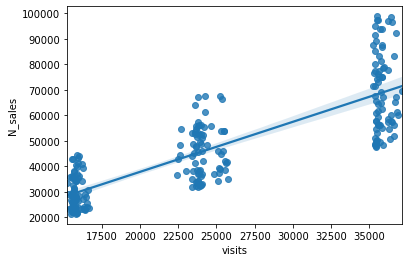

In [47]:
#Correlation is 2018
xcorr18 = df_2018['visits']
ycorr18= df_2018['N_sales']
my_rho = np.corrcoef(xcorr18, ycorr18)
print (my_rho)
sns.regplot(x=df_2018["visits"], y=df_2018["N_sales"])

[[1.         0.80501001]
 [0.80501001 1.        ]]


<AxesSubplot:xlabel='visits', ylabel='N_sales'>

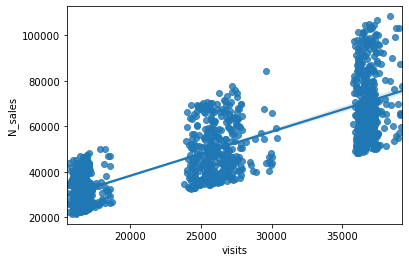

In [48]:
#Correlation is 2018
xcorr19 = df_2019['visits']
ycorr19= df_2019['N_sales']
my_rho = np.corrcoef(xcorr19, ycorr19)
print (my_rho)
sns.regplot(x=df_2019["visits"], y=df_2019["N_sales"])

### Milan 2019
We applied a Multiple Linear Regression to predict the sales' values in each city.

In [49]:
## Prepare the Dataset
X = Milan19[['convrate','visits']]
Y = Milan19['N_sales']

## Apply multiple Linear Regression
model = smf.ols(formula='N_sales ~ convrate + visits', data=Milan19)
results_formula = model.fit()
results_formula.params

Intercept     74633.545609
convrate    -133067.085244
visits            1.866605
dtype: float64

In [50]:
## Prepare the data for Visualization
x_surf, y_surf = np.meshgrid(np.linspace(Milan18.convrate.min(), Milan19.convrate.max(), 100),np.linspace(Milan19.visits.min(), Milan19.visits.max(), 100))
onlyX = pd.DataFrame({'convrate': x_surf.ravel(), 'visits': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)

### Data Visualization

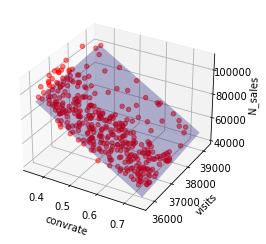

Parameters:  Intercept     74633.545609
convrate    -133067.085244
visits            1.866605
dtype: float64
R2:  0.9611456298532879


In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Milan19['convrate'],Milan19['visits'],Milan19['N_sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('convrate')
ax.set_ylabel('visits')
ax.set_zlabel('N_sales')
plt.show()

print("Parameters: ", results_formula.params)
print("R2: ", results_formula.rsquared)

### Rome 2019

In [52]:
## Prepare the Dataset
X = Rome19[['convrate','visits']]
y = Rome19['N_sales']

## Apply multiple Linear Regression
model = smf.ols(formula='N_sales ~ convrate + visits', data=Rome19)
results_formula = model.fit()
results_formula.params

Intercept    33023.690284
convrate    -60307.315600
visits           1.905842
dtype: float64

In [53]:
## Prepare the data for Visualization
x_surf, y_surf = np.meshgrid(np.linspace(Rome19.convrate.min(), Rome19.convrate.max(), 100),np.linspace(Rome19.visits.min(), Rome19.visits.max(), 100))
onlyX = pd.DataFrame({'convrate': x_surf.ravel(), 'visits': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)

### Data visualization

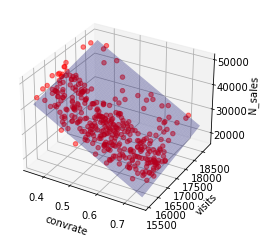

Parameters:  Intercept    33023.690284
convrate    -60307.315600
visits           1.905842
dtype: float64
R2:  0.9597689235543408


In [54]:
# Visualize the Data for Multiple Linear Regression
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Rome19['convrate'],Rome19['visits'],Rome19['N_sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('convrate')
ax.set_ylabel('visits')
ax.set_zlabel('N_sales')
plt.show()

print("Parameters: ", results_formula.params)
print("R2: ", results_formula.rsquared)

### Naples 2019

In [55]:
## Prepare the Dataset
X = Naples19[['convrate','visits']]
y = Naples19['N_sales']

## Apply multiple Linear Regression
model = smf.ols(formula='N_sales ~ convrate + visits', data=Naples18)
results_formula = model.fit()
results_formula.params

Intercept    43751.300850
convrate    -82725.239341
visits           1.973172
dtype: float64

In [56]:
## Prepare the data for Visualization
x_surf, y_surf = np.meshgrid(np.linspace(Naples19.convrate.min(), Naples19.convrate.max(), 100),np.linspace(Naples19.visits.min(), Naples19.visits.max(), 100))
onlyX = pd.DataFrame({'convrate': x_surf.ravel(), 'visits': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)

### Data Visualization

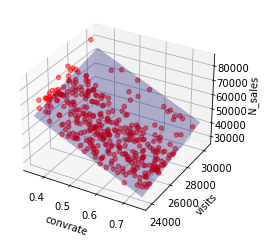

Parameters:  Intercept    43751.300850
convrate    -82725.239341
visits           1.973172
dtype: float64
R2:  0.9621705366292052


In [57]:
# Visualize the Data for Multiple Linear Regression
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Naples19['convrate'],Naples19['visits'],Naples19['N_sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('convrate')
ax.set_ylabel('visits')
ax.set_zlabel('N_sales')
plt.show()

print("Parameters: ", results_formula.params)
print("R2: ", results_formula.rsquared)

### Decision Tree

### Milan 2019

In [58]:
Milan19["city"] = pd.to_numeric(Milan19.city, errors='coerce')
X= Milan19[['convrate','avspend','visits']].values
y= Milan19['N_sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor().fit(X_train, y_train)
#predicting results
y_pred = regressor.predict(X_test)

#Comparing real values with predicted values
compare_dfM19 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
compare_dfM19

<ipython-input-58-d84aef40f9ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Milan19["city"] = pd.to_numeric(Milan19.city, errors='coerce')


Real Values  Predicted Values
0    100229.946524      98885.026738
1     73761.224490      74451.345756
2     65913.996627      65098.333333
3     97806.970509      97885.333333
4     61947.107438      65098.333333
..             ...               ...
105   87871.046229      88434.146341
106   63018.675722      62979.557070
107   69771.062271      67660.617060
108   62415.692821      64041.166381
109   74141.716567      73956.175299

[110 rows x 2 columns]

### Data Visualization

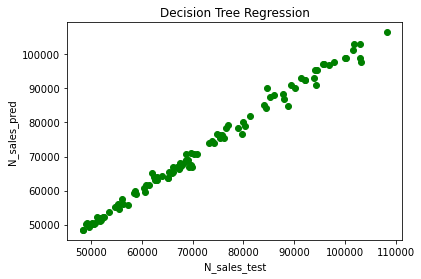

0.9975813249400057


In [59]:
# Visualising the Decision Tree Regression Results 
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('N_sales_test')
plt.ylabel('N_sales_pred')
plt.show()

train_accuracy = regressor.score(X, y)
print(train_accuracy)

### Rome 2019

In [60]:
Rome19["city"] = pd.to_numeric(Rome19.city, errors='coerce')
X= Rome19[['convrate','avspend','visits']].values
y= Rome19['N_sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor().fit(X_train, y_train)
#predicting results
y_pred = regressor.predict(X_test)

#Comparing real values with predicted values
compare_dfR19 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
compare_dfR19

<ipython-input-60-2874ca25f2d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rome19["city"] = pd.to_numeric(Rome19.city, errors='coerce')


Real Values  Predicted Values
0    39556.074766      39627.039627
1    22229.166667      22480.821918
2    23808.035714      23760.772660
3    23314.002829      24129.814551
4    36864.864865      37122.448980
..            ...               ...
105  25568.778980      25629.860031
106  31940.663176      31518.771331
107  28857.885615      29022.569444
108  23029.126214      23061.983471
109  30206.349206      29792.321117

[110 rows x 2 columns]

### Data Visualization

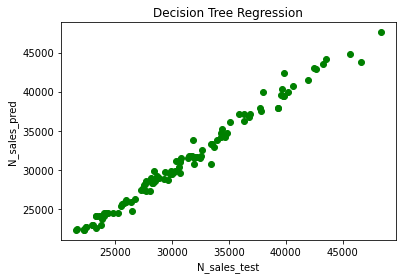

0.99625511722032


In [61]:
# Visualising the Decision Tree Regression Results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('N_sales_test')
plt.ylabel('N_sales_pred')
plt.show()

train_accuracy = regressor.score(X, y)
print(train_accuracy)

### Naples 2019

In [62]:
Naples19["city"] = pd.to_numeric(Naples19.city, errors='coerce')
X= Naples19[['convrate','avspend','visits']].values
y= Naples19['N_sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor().fit(X_train, y_train)
#predicting results
y_pred = regressor.predict(X_test)

#Comparing real values with predicted values
compare_dfN19 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
compare_dfN19

<ipython-input-62-5e4928bcbe10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Naples19["city"] = pd.to_numeric(Naples19.city, errors='coerce')


Real Values  Predicted Values
0    74647.696477      73426.229508
1    67382.151030      63305.045872
2    70038.043478      70030.054645
3    37348.765432      38412.044374
4    59628.318584      57019.736842
..            ...               ...
105  45363.957597      46653.778559
106  50736.220472      50891.304348
107  46086.058520      44727.879800
108  63918.854415      61307.328605
109  39091.463415      38282.738095

[110 rows x 2 columns]

### Data Visualization

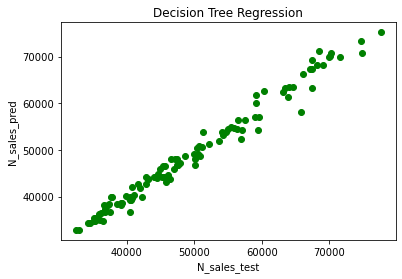

0.9932092906891082


In [63]:
# Visualizing the Decision Tree Regression Results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('N_sales_test')
plt.ylabel('N_sales_pred')
plt.show()

train_accuracy = regressor.score(X, y)
print(train_accuracy)

### Granger causality
It permits us to uderstand if the sales depends on the visits

In [64]:
Milan = df[df["city"] == "Milan"]
Rome = df[df["city"] == "Rome"]
Naples = df[df["city"] == "Naples"]

Milan.index = pd.to_datetime(Milan.day)
  
Milan= Milan[['visits','N_sales',]]

In [65]:

ts_log = np.log(Milan)

grangercausalitytests(ts_log[['visits', 'N_sales']], maxlag=4)
grangercausalitytests(ts_log[['N_sales', 'visits']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2030  , p=0.6525  , df_denom=483, df_num=1
ssr based chi2 test:   chi2=0.2043  , p=0.6513  , df=1
likelihood ratio test: chi2=0.2042  , p=0.6513  , df=1
parameter F test:         F=0.2030  , p=0.6525  , df_denom=483, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2853  , p=0.7519  , df_denom=480, df_num=2
ssr based chi2 test:   chi2=0.5765  , p=0.7496  , df=2
likelihood ratio test: chi2=0.5761  , p=0.7497  , df=2
parameter F test:         F=0.2853  , p=0.7519  , df_denom=480, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1665  , p=0.9190  , df_denom=477, df_num=3
ssr based chi2 test:   chi2=0.5068  , p=0.9174  , df=3
likelihood ratio test: chi2=0.5065  , p=0.9175  , df=3
parameter F test:         F=0.1665  , p=0.9190  , df_denom=477, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3103  , p=0.2651  

{1: ({'ssr_ftest': (5.619387570731075, 0.01815453881932516, 483.0, 1),
   'ssr_chi2test': (5.654290599120709, 0.017412716793475086, 1),
   'lrtest': (5.621651533690283, 0.01773992446812539, 1),
   'params_ftest': (5.619387570731607, 0.018154538819320616, 483.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.9792195369329493, 0.051773336175072494, 480.0, 2),
   'ssr_chi2test': (6.020506147552002, 0.04927920590753539, 2),
   'lrtest': (5.983445015961934, 0.05020089077193808, 2),
   'params_ftest': (2.9792195369330376, 0.051773336175067415, 480.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.3172803097177077, 0.07485919493539277, 477.0, 3),
   'ssr_chi2test': (7.053859559140695, 0.07020075478455716, 3),
   'lrtest': (7.0029517939199195, 0.0718037482736229, 3),
   'params_ftest': (2.3172803097186527, 0.07485919493530124, 477.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

Null Hypothesis (H0) : N_sales do not granger cause visits. Alternative Hypothesis (HA) : N_sales granger cause visits.

Results:
p-value is high, Null hypothesis is accepted hence N_sales are not granger causing visits. That implies visits came first.

Now repeat the Granger causality test in the opposite direction. Null Hypothesis (H0) : visits does not granger cause N_sales. Alternative Hypothesis (HA) : visits granger causes N_sales.
The p-value is considerably low thus visits are granger cause N_sales. The above analysis concludes that the visits came first and not the N_sales.

### Given the generality of these models, we proceded to apply specific models used for time series.
#### Arima model for visits variable
Now, we will use three datasets, one for each city.

In [66]:
Milan = df[df["city"] == "Milan"]
Rome = df[df["city"] == "Rome"]
Naples = df[df["city"] == "Naples"]

### Milan
#### Data Cleaning

In [67]:
Milan.index = pd.to_datetime(Milan.day)
Milan =Milan["visits"]['2018-10-15':'2020-2-13']
Milan.describe()

count      487.000000
mean     36775.940452
std        816.343609
min      35213.000000
25%      36189.000000
50%      36696.000000
75%      37284.500000
max      39224.000000
Name: visits, dtype: float64

#### Data Exploration

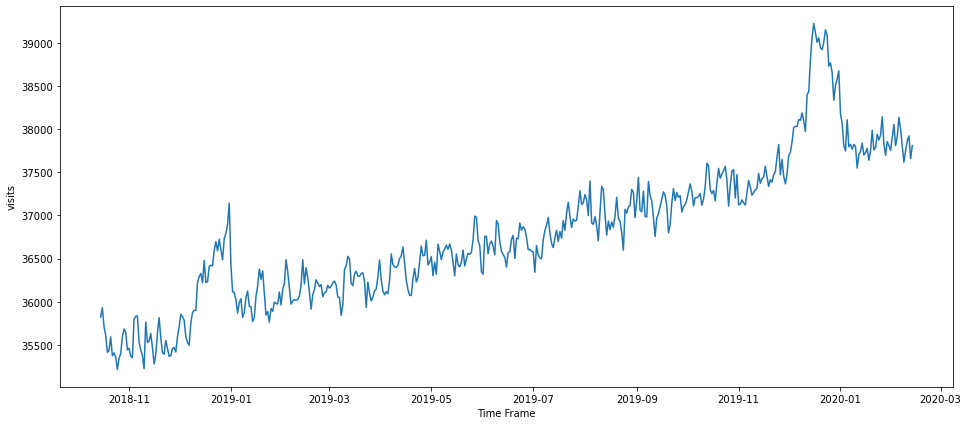

In [68]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('visits')
ax1.plot(Milan)

### Checking stationarity
We checked if our variable is stationary and we did it through two methods.

#### Method 1: Dickey Fuller

In [69]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(Milan)

ADF Statistics: -1.5001017056485213
p- value: 0.5334610259801258
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Method 2: Rolling Statistics

In [70]:
rolLmean = Milan.rolling(17).mean()
rolLstd = Milan.rolling(17).std()

Plot rolling statistics

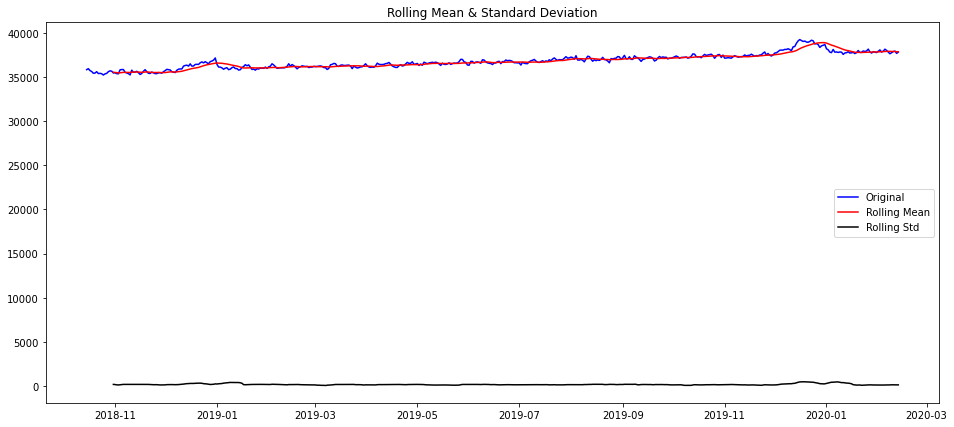

In [71]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

orig = plt.plot(Milan, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Making series stationary with log transformation

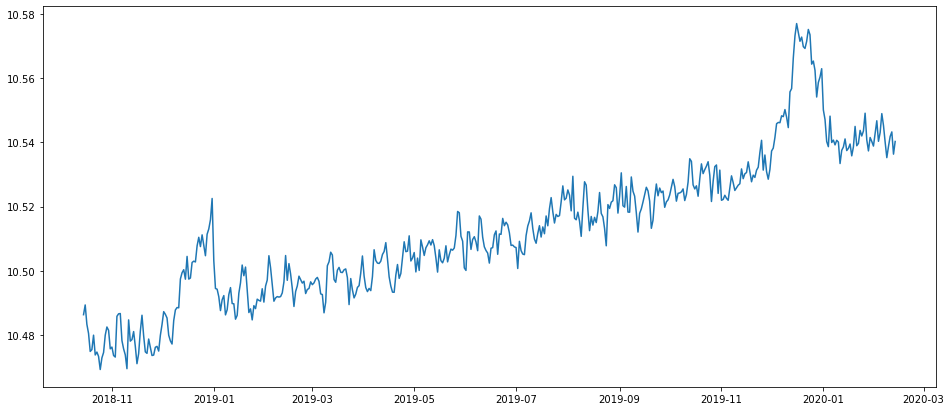

In [72]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

ts_log = np.log(Milan)
plt.plot(ts_log)

#### Seasonal Decomposition

In [73]:
decomposition = seasonal_decompose(ts_log,period=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#### Data Visualization of the decomposition
Different plots for trend, seasonality and residuals

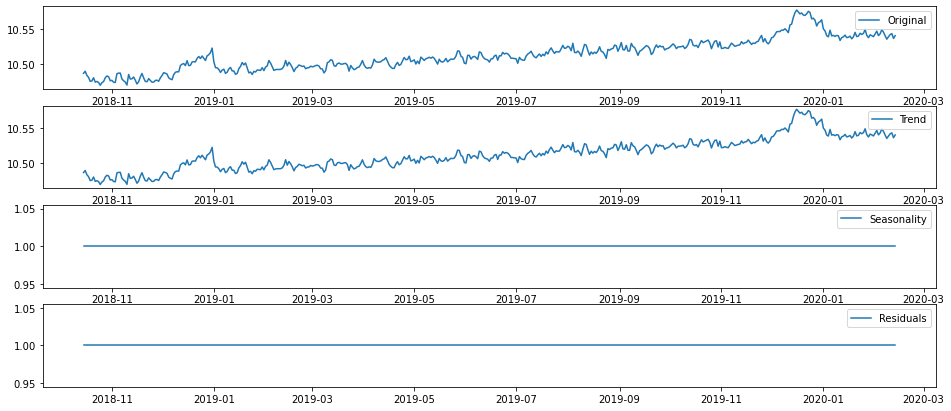

In [74]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

#### Differencing plot
Checking if the variable is stationary after the transformation

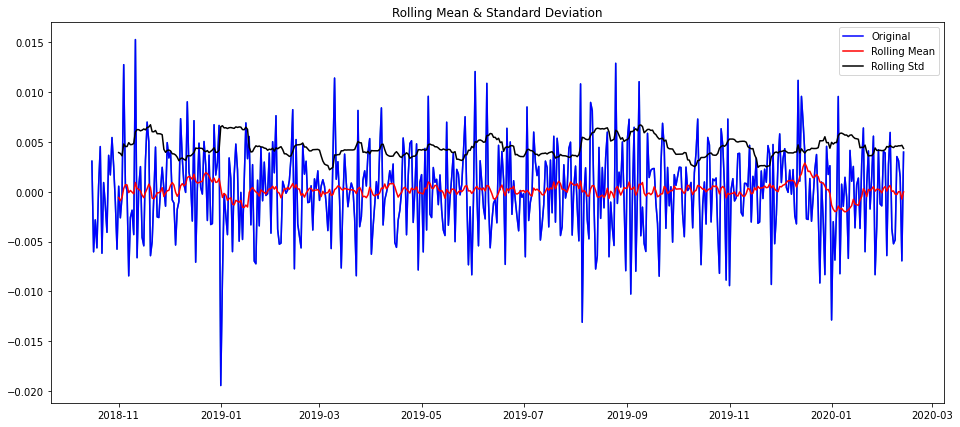

In [75]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(17).mean()
rolLstd = ts_log_diff.rolling(17).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Autocorrelation plot

In [76]:
Milan.sort_index(inplace= True)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


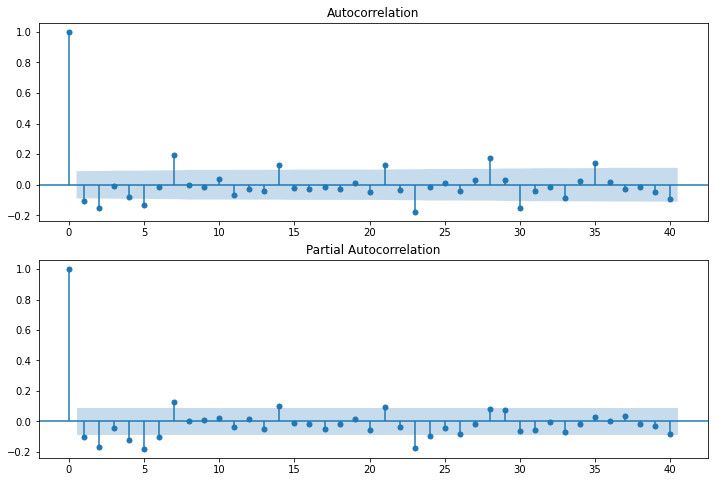

In [77]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

### Fit ARIMA

In [78]:
type(ts_log_diff)

#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

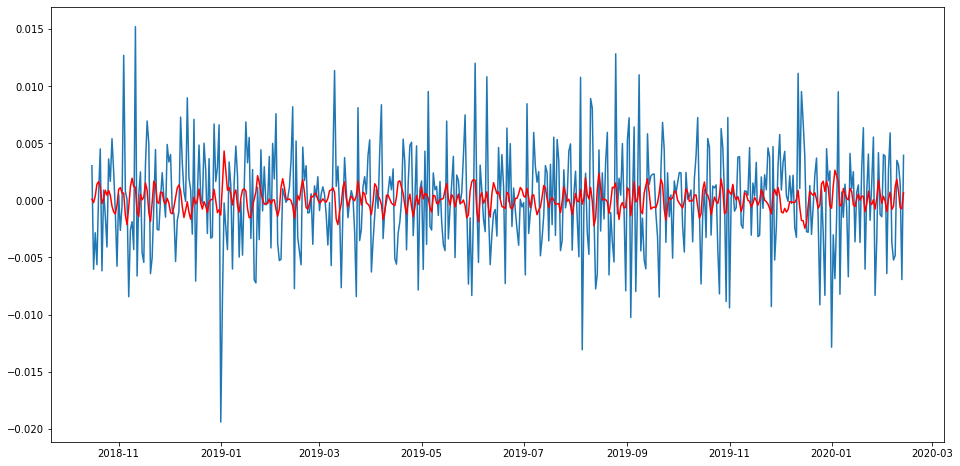

In [79]:
#Plot
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(3,0,0))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

#### Then, we took the variable back to the original scale (from the logarithm)

In [80]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

day
2018-10-16    0.000112
2018-10-17   -0.000195
2018-10-18    0.000375
2018-10-19    0.001421
2018-10-20    0.001647
dtype: float64


In [81]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

day
2018-10-16    0.000112
2018-10-17   -0.000083
2018-10-18    0.000293
2018-10-19    0.001714
2018-10-20    0.003361
dtype: float64


In [82]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

day
2018-10-15    10.486262
2018-10-16    10.486374
2018-10-17    10.486179
2018-10-18    10.486554
2018-10-19    10.487976
dtype: float64

#### Plotting and evaluation (RMSE)

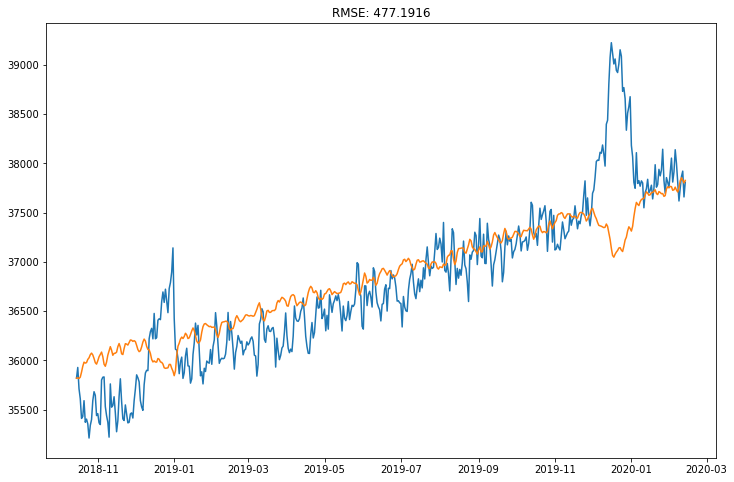

In [83]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(Milan)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Milan)**2)/len(Milan)))
plt.show()

#### Finding the best parameters for ARIMA

In [84]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-3863.518, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2328.383, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3883.804, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2872.201, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3675.433, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3886.308, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-3896.619, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-3895.304, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-3892.308, Time=0.15 sec


/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3852.186, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-3892.236, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 2.287 seconds


ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True)

### ARIMA model for visits variable in Rome

#### Data Cleaning

In [85]:
Rome.index = pd.to_datetime(Rome.day)
  
Rome =Rome["visits"]['2018-10-15':'2020-2-13']
Rome.describe()

count      487.000000
mean     16625.453799
std        665.093469
min      15251.000000
25%      16166.000000
50%      16574.000000
75%      16996.000000
max      18744.000000
Name: visits, dtype: float64

#### Data Exploration

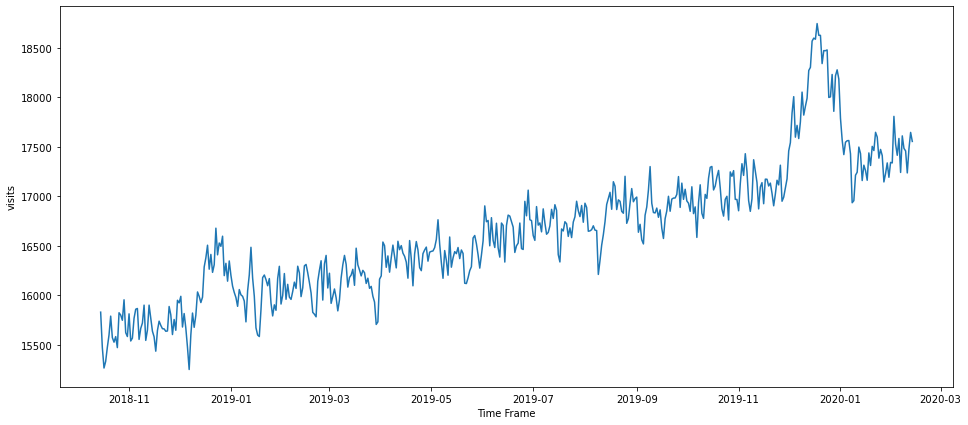

In [86]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('visits')
ax1.plot(Rome)

#### Checking Stationarity
#### Method 1: Dickey Fuller

In [87]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(Rome)

ADF Statistics: -1.5024102968637938
p- value: 0.5323186643253375
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Method 2: Rolling Statistics

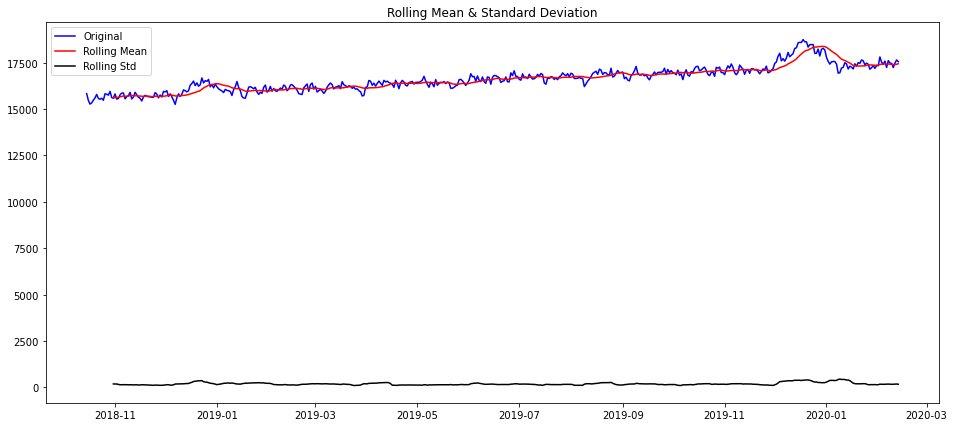

In [88]:
#Determing rolling statistics
rolLmean = Rome.rolling(17).mean()
rolLstd = Rome.rolling(17).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(Rome, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Making series stationary

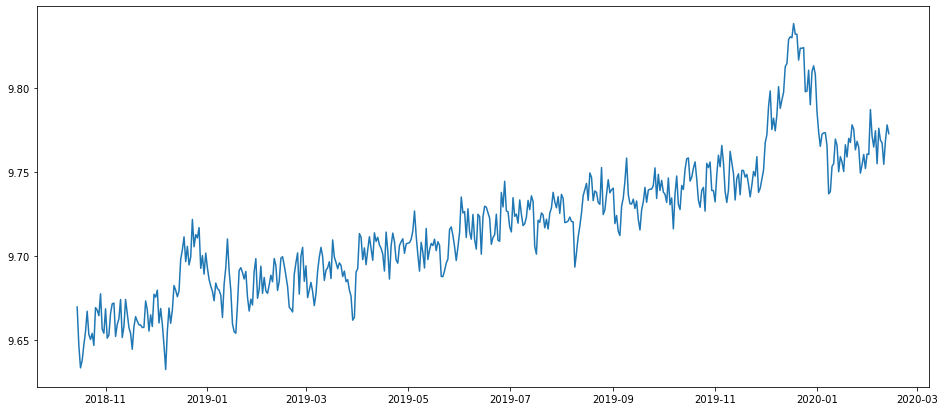

In [89]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(Rome)
plt.plot(ts_log)

#### Decomposition

<ipython-input-90-df9fae96ce9e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')


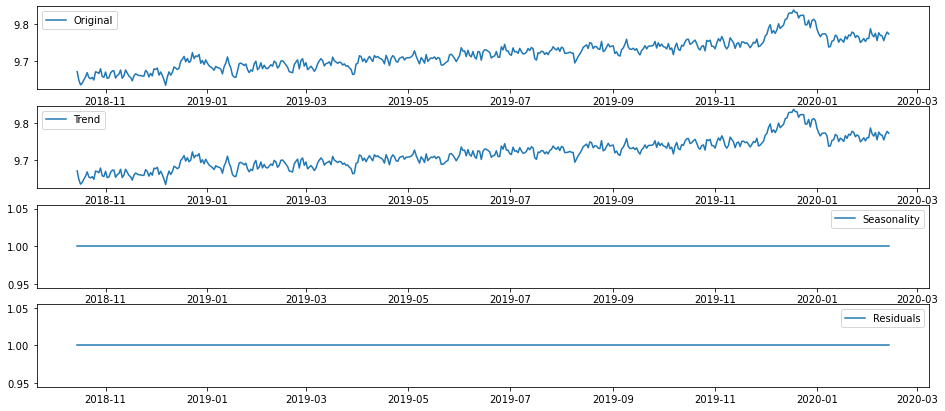

In [90]:
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

#### Differencing

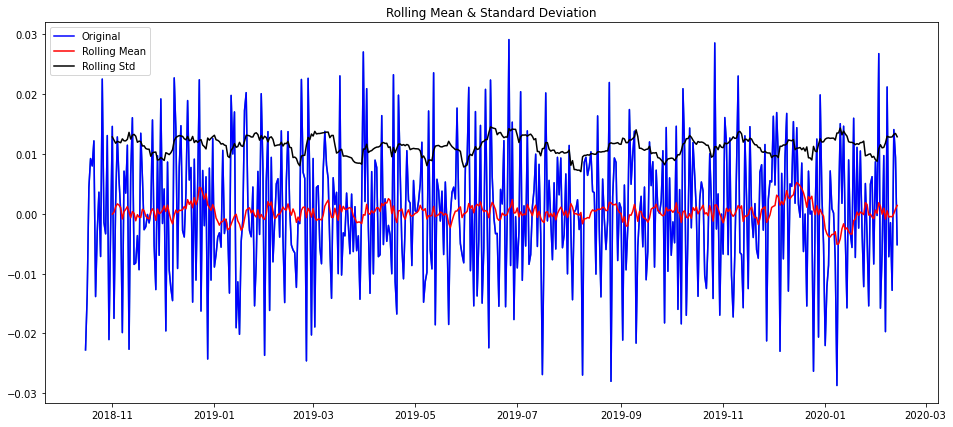

In [91]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(17).mean()
rolLstd = ts_log_diff.rolling(17).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [92]:
Rome.sort_index(inplace= True)

In [93]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


#### Autocorrelation

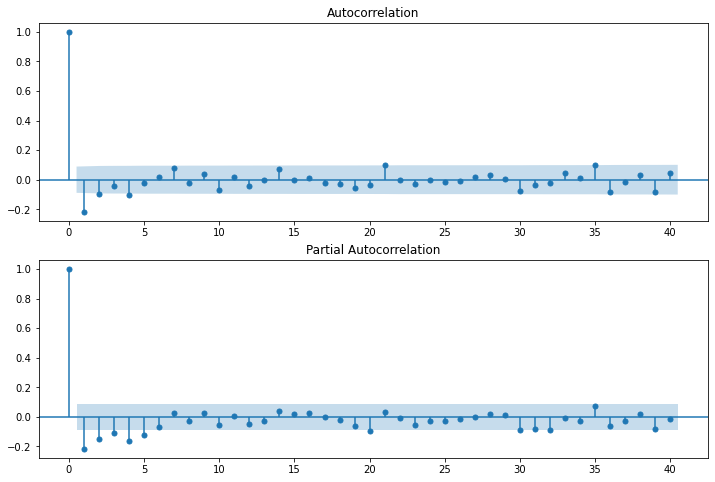

In [94]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

#### Fit the ARIMA model

In [95]:
from statsmodels.tsa.arima_model import ARIMA
type(ts_log_diff)

pandas.core.series.Series

In [96]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

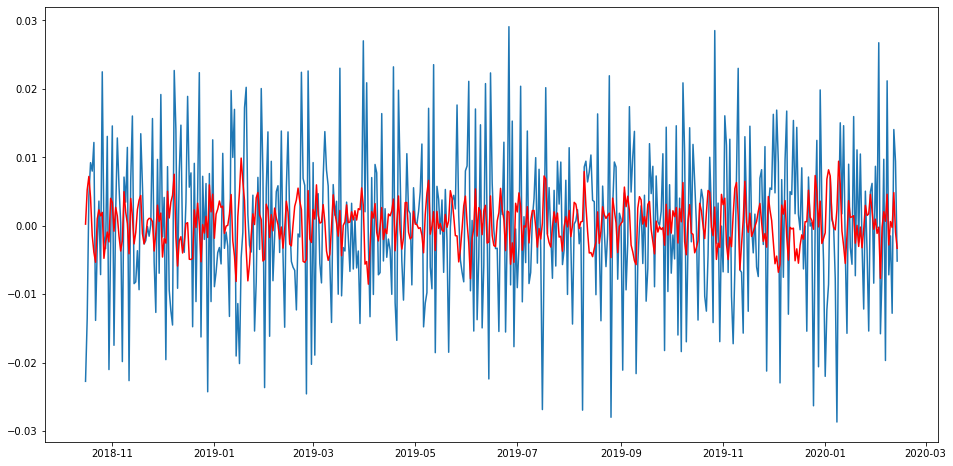

In [97]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(3,0,0))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [98]:
#Taking results back to original scale
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

day
2018-10-16    0.000233
2018-10-17    0.005239
2018-10-18    0.007205
2018-10-19    0.004108
2018-10-20   -0.001422
dtype: float64


In [99]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

day
2018-10-16    0.000233
2018-10-17    0.005472
2018-10-18    0.012677
2018-10-19    0.016785
2018-10-20    0.015363
dtype: float64


In [100]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

day
2018-10-15    9.669662
2018-10-16    9.669895
2018-10-17    9.675134
2018-10-18    9.682339
2018-10-19    9.686447
dtype: float64

#### Plotting

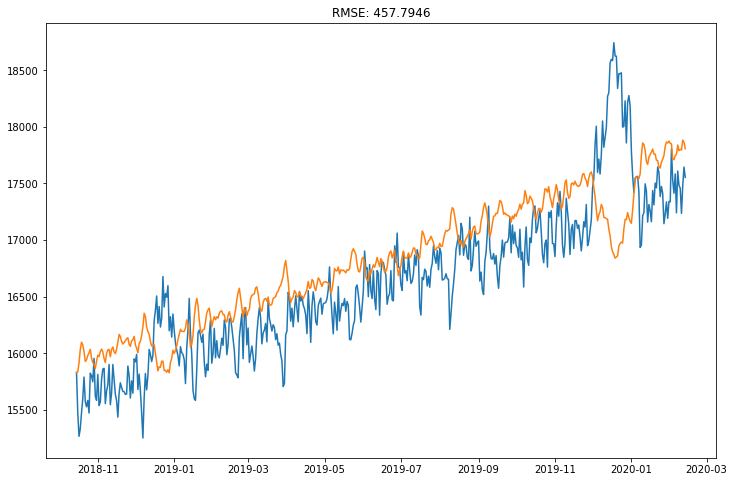

In [101]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(Rome)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Rome)**2)/len(Rome)))
plt.show()

### ARIMA model for visit variable in Naples

In [102]:
#Data Cleaning
Naples.index = pd.to_datetime(Naples.day)
  
Naples =Naples["visits"]['2018-10-15':'2020-2-13']
Naples.describe()

count      487.000000
mean     26013.223819
std       1577.805534
min      22428.000000
25%      24797.000000
50%      25776.000000
75%      27117.000000
max      30359.000000
Name: visits, dtype: float64

#### Data Exploration

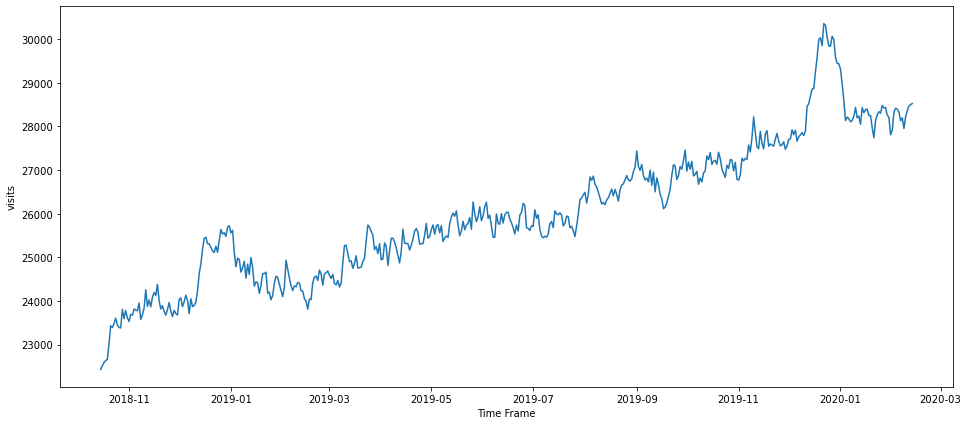

In [103]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('visits')
ax1.plot(Naples)

#### Checking stationarity with two methods
#### Method 1: Dickey Fuller

In [104]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(Naples)

ADF Statistics: -1.135749480389806
p- value: 0.7006069827375822
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Method 2: Rolling Statstics 

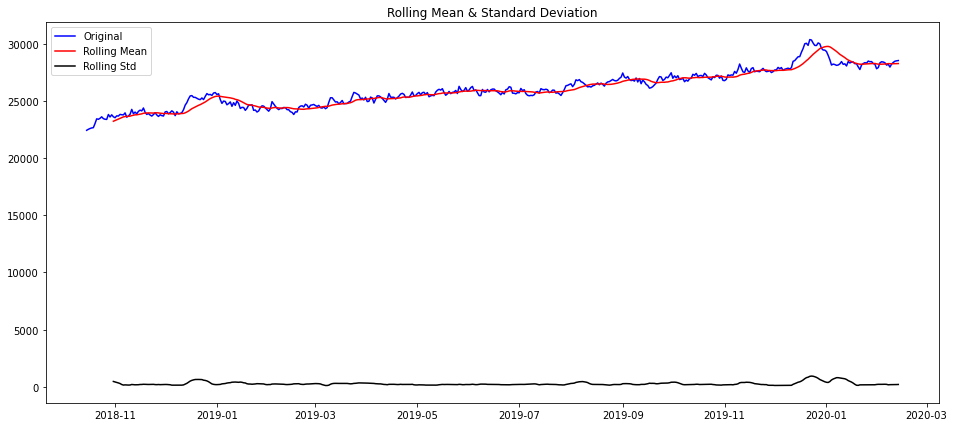

In [105]:
#Determing rolling statistics
rolLmean = Naples.rolling(17).mean()
rolLstd = Naples.rolling(17).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(Naples, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Making series stationary

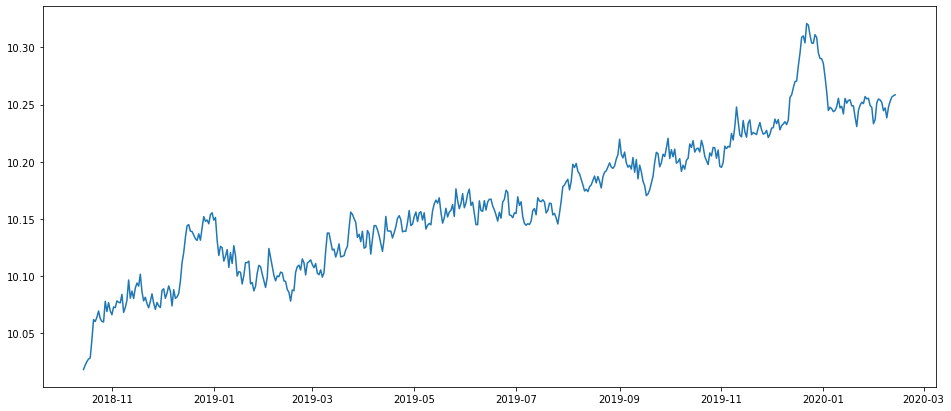

In [106]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(Naples)
plt.plot(ts_log)

#### Decomposition

<ipython-input-107-df9fae96ce9e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')


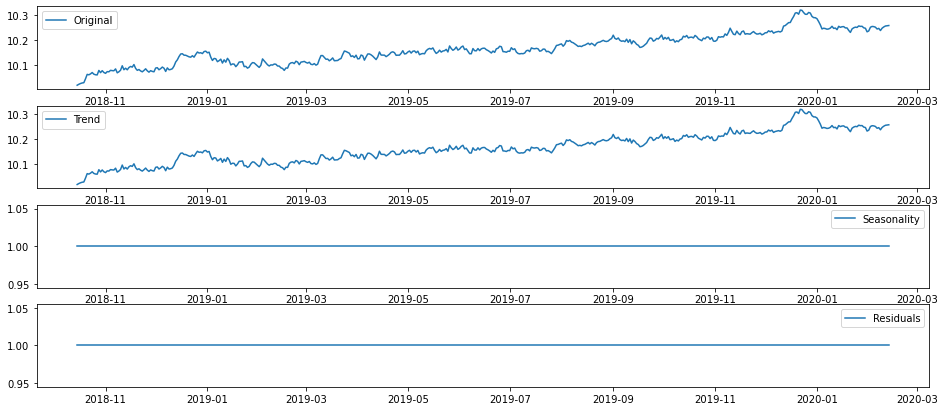

In [107]:
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

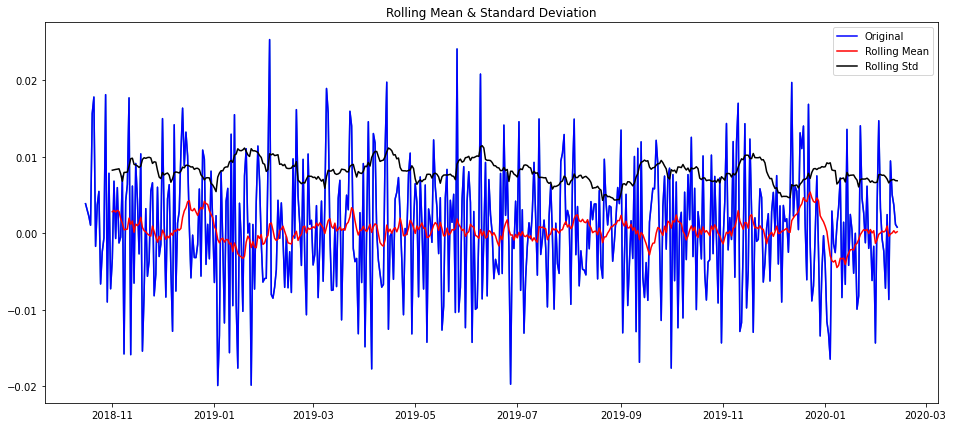

In [108]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(17).mean()
rolLstd = ts_log_diff.rolling(17).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Fit the ARIMA model

In [109]:
Naples.sort_index(inplace= True)

In [110]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


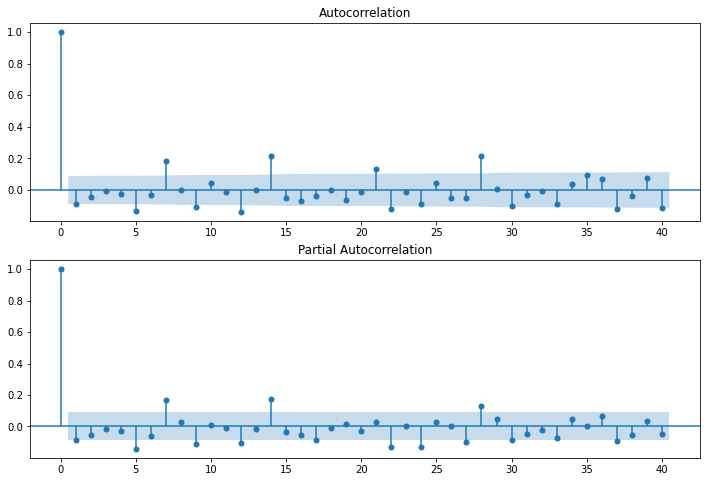

In [111]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [112]:
type(ts_log_diff)

pandas.core.series.Series

In [113]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

#### Plot

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

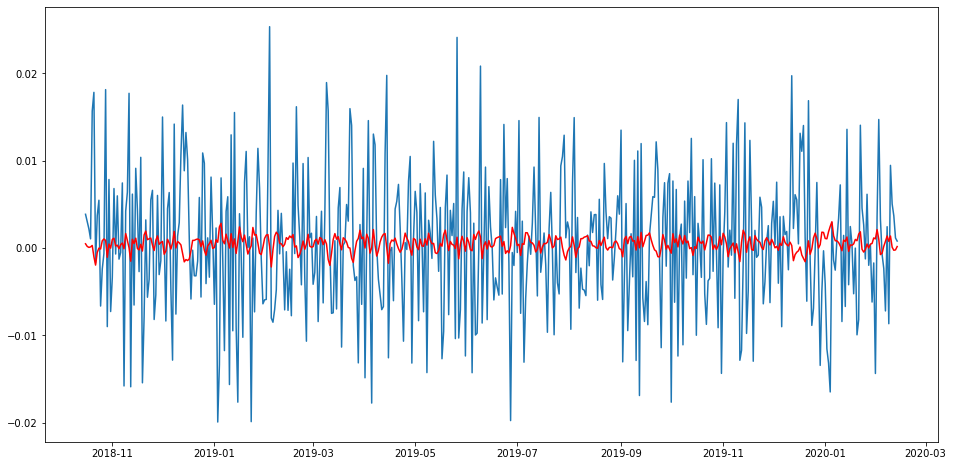

In [114]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(3,0,0))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [115]:
#Taking results back to original scale
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

day
2018-10-16    0.000493
2018-10-17    0.000195
2018-10-18    0.000082
2018-10-19    0.000136
2018-10-20    0.000304
dtype: float64


In [116]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

day
2018-10-16    0.000493
2018-10-17    0.000688
2018-10-18    0.000770
2018-10-19    0.000907
2018-10-20    0.001210
dtype: float64


In [117]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

day
2018-10-15    10.018065
2018-10-16    10.018559
2018-10-17    10.018754
2018-10-18    10.018836
2018-10-19    10.018972
dtype: float64

#### Model plotting and evaluation

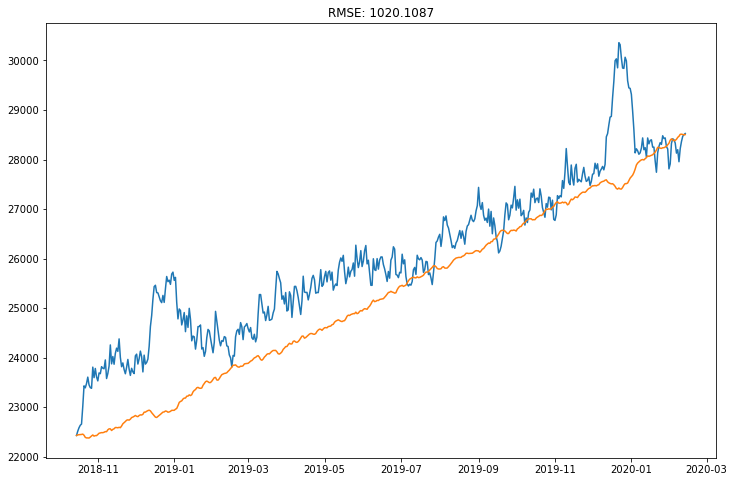

In [118]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(Naples)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Naples)**2)/len(Naples)))
plt.show()

### ARIMA model for sales variable

In [119]:
#3 dataset for each city
Milan = df[df["city"] == "Milan"]
Rome = df[df["city"] == "Rome"]
Naples = df[df["city"] == "Naples"]

In [120]:
#Data Cleaning
Milan.index = pd.to_datetime(Milan.day)
  
Milan =Milan["N_sales"]['2018-10-15':'2020-2-13']
Milan.describe()

count       487.000000
mean      71116.896400
std       15860.474596
min       47602.150538
25%       57249.110344
50%       68273.764259
75%       83378.614468
max      108293.785311
Name: N_sales, dtype: float64

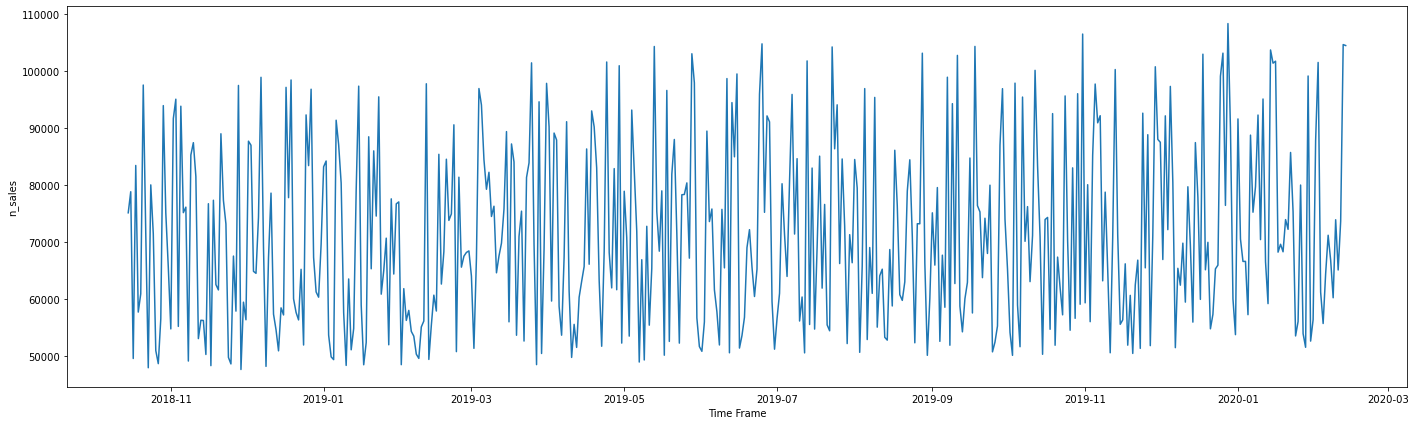

In [121]:
#Data Exploration
plt.figure(figsize=(24,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('n_sales')
ax1.plot(Milan)

In [122]:
# Checking stationarity
# Method 1 -  Dickey fuller
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(Milan)

ADF Statistics: -13.677832642252373
p- value: 1.419129002486693e-25
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


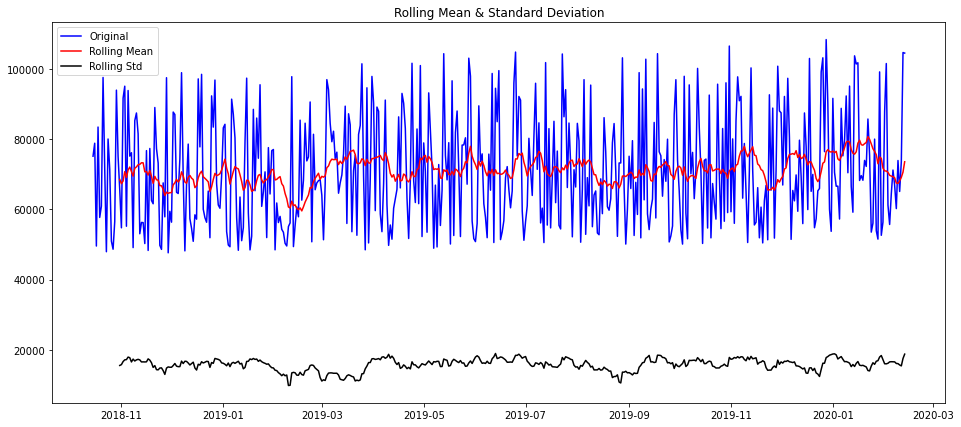

In [123]:
# Method 2 -  Rolling Statistics
#Determing rolling statistics
rolLmean = Milan.rolling(17).mean()
rolLstd = Milan.rolling(17).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(Milan, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [124]:
Milan.sort_index(inplace= True)

In [125]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(Milan, nlags=20)
lag_pacf = pacf(Milan, nlags=20)

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


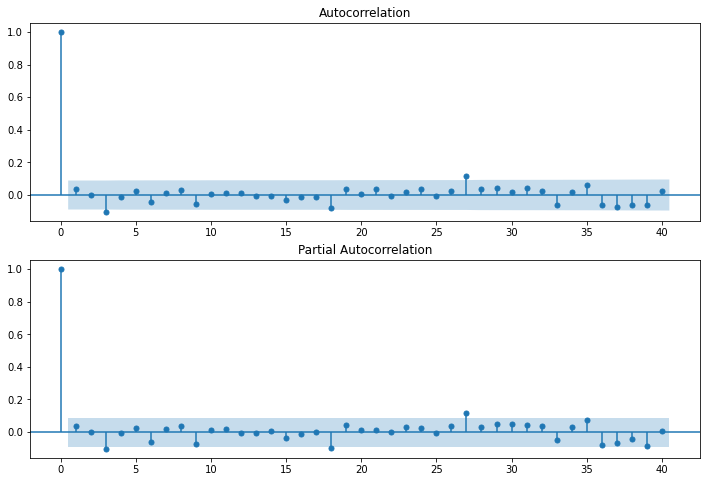

In [126]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Milan.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Milan.dropna(),lags=40,ax=ax2)

In [127]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,10,30)
test_dataset_end=datetime(2020,2,13)
train_data=Milan[:train_dataset_end]
test_data=Milan[train_dataset_end+timedelta(days=1):test_dataset_end]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

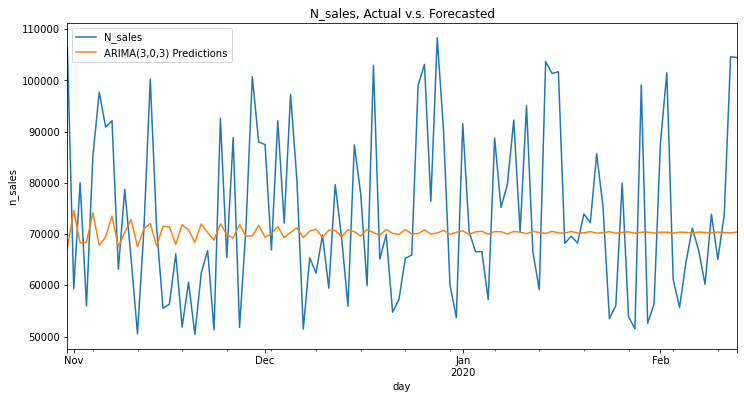

In [128]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(train_data, order=(3,0,3))  
results_ARIMA = model.fit()  
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results_ARIMA.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(3,0,3) Predictions')
ax = test_data.plot(legend=True,figsize=(12,6),title='N_sales, Actual v.s. Forecasted')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='n_sales');

In [129]:
from statsmodels.tools.eval_measures import rmse
error2 = rmse(test_data,predictions)
print(f"The RMSE for test data is {error2}")

The RMSE for test data is 16876.71163872828


In [130]:
#3 dataset for each city
Milan = df[df["city"] == "Milan"]
Rome = df[df["city"] == "Rome"]
Naples = df[df["city"] == "Naples"]

In [131]:
#Data Cleaning
Rome.index = pd.to_datetime(Rome.day)
  
Rome =Rome["N_sales"]['2018-10-15':'2020-2-13']
Rome.describe()

count      487.000000
mean     31520.777644
std       6949.564812
min      21293.405114
25%      25799.233836
50%      30206.349206
75%      36099.002660
max      49906.849315
Name: N_sales, dtype: float64

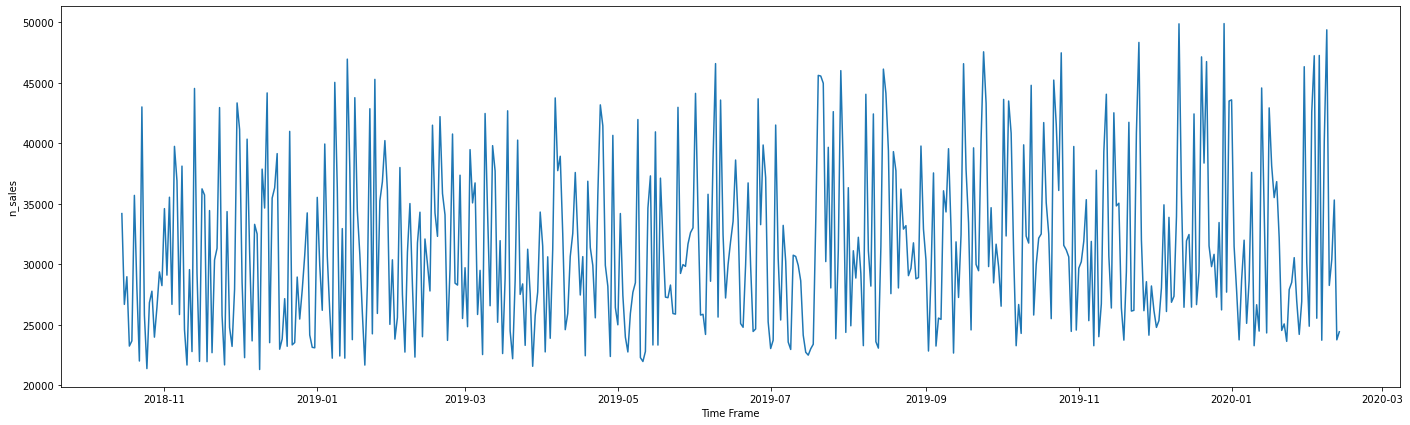

In [132]:
#Data Exploration
plt.figure(figsize=(24,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('n_sales')
ax1.plot(Rome)

In [133]:
# Checking stationarity
# Method 1 -  Dickey fuller
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(Rome)

ADF Statistics: -20.879766098253803
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


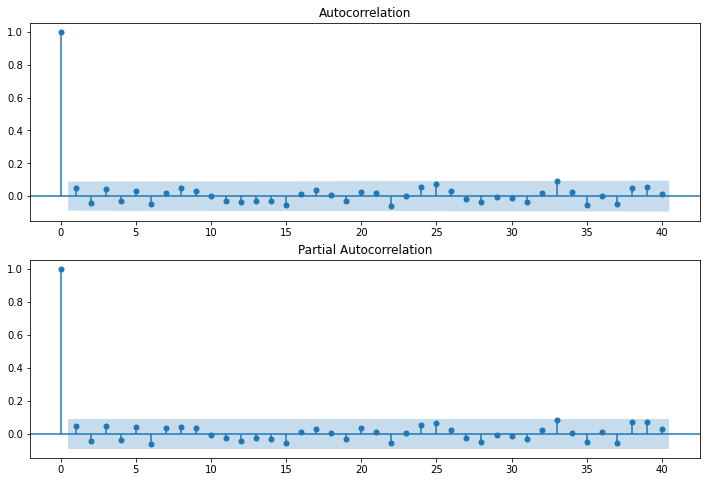

In [134]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(Rome, nlags=20)
lag_pacf = pacf(Rome, nlags=20)
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Rome.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Rome.dropna(),lags=40,ax=ax2)

In [135]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,10,30)
test_dataset_end=datetime(2020,2,13)
train_data=Rome[:train_dataset_end]
test_data=Rome[train_dataset_end+timedelta(days=1):test_dataset_end]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

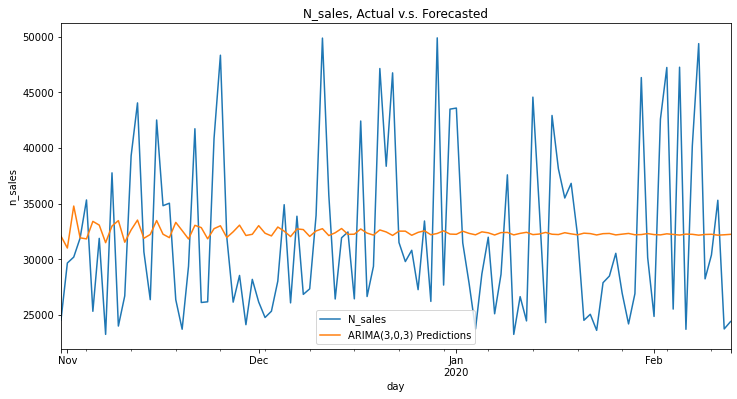

In [136]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(train_data, order=(5,0,5))  
results_ARIMA = model.fit()  
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results_ARIMA.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(3,0,3) Predictions')
ax = test_data.plot(legend=True,figsize=(12,6),title='N_sales, Actual v.s. Forecasted')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='n_sales');

In [137]:
from statsmodels.tools.eval_measures import rmse
error2 = rmse(test_data,predictions)
print(f"The RMSE for test data is {error2}")

The RMSE for test data is 7437.78904973205


### ARIMA model for Naples

In [138]:
#3 dataset for each city
Milan = df[df["city"] == "Milan"]
Rome = df[df["city"] == "Rome"]
Naples = df[df["city"] == "Naples"]

In [139]:
#Data Cleaning
Naples.index = pd.to_datetime(Naples.day)
  
Naples =Naples["N_sales"]['2018-10-15':'2020-2-13']
Naples.describe()

count      487.000000
mean     49591.105100
std      11440.684710
min      31912.751678
25%      39883.336644
50%      47475.319927
75%      56964.312865
max      84068.181818
Name: N_sales, dtype: float64

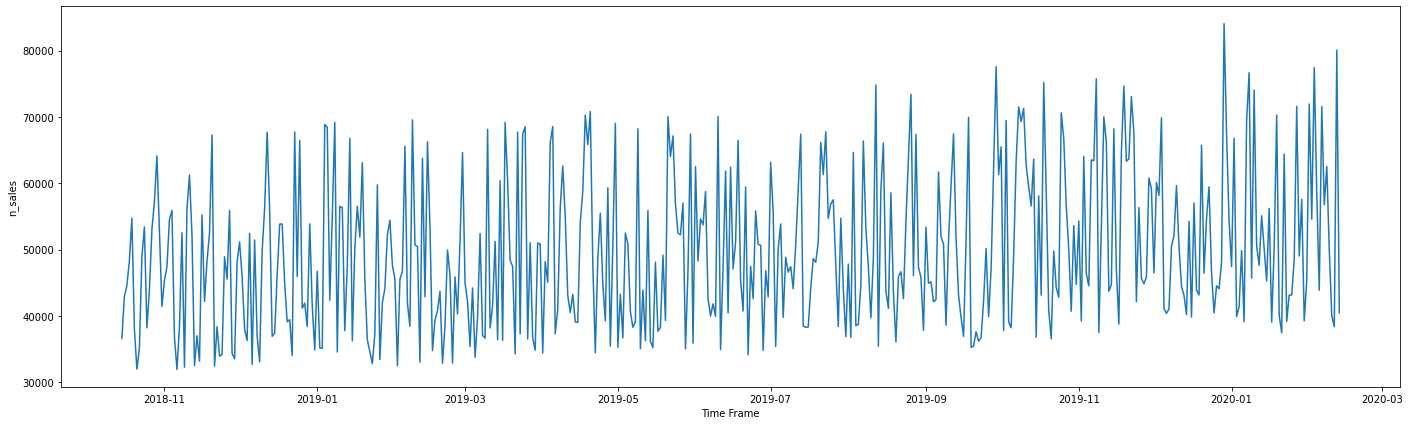

In [140]:
#Data Exploration
plt.figure(figsize=(24,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('n_sales')
ax1.plot(Naples)

In [141]:
# Checking stationarity
# Method 1 -  Dickey fuller
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(Naples)

ADF Statistics: -19.53545093414264
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


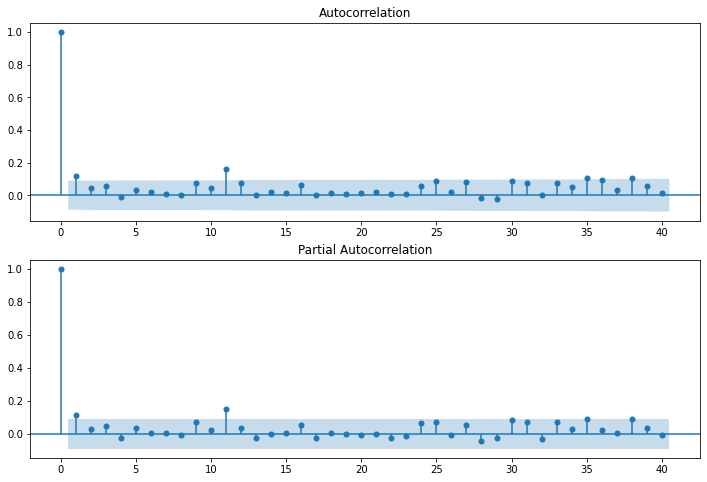

In [142]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(Naples, nlags=20)
lag_pacf = pacf(Naples, nlags=20)
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Naples.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Naples.dropna(),lags=40,ax=ax2)

In [143]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,10,30)
test_dataset_end=datetime(2020,2,13)
train_data=Naples[:train_dataset_end]
test_data=Naples[train_dataset_end+timedelta(days=1):test_dataset_end]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

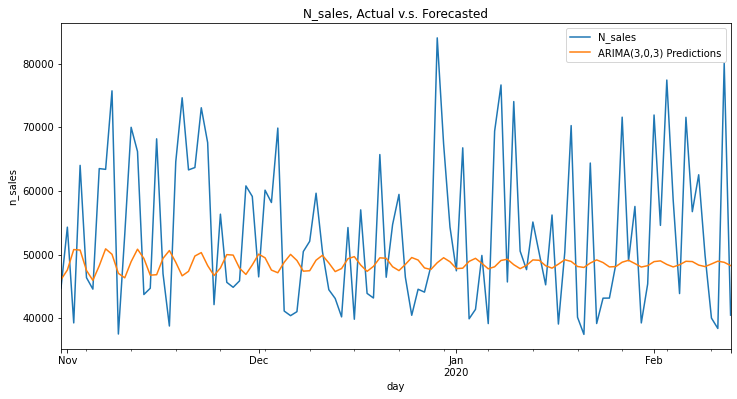

In [144]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(train_data, order=(3,0,3))  
results_ARIMA = model.fit()  
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results_ARIMA.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(3,0,3) Predictions')
ax = test_data.plot(legend=True,figsize=(12,6),title='N_sales, Actual v.s. Forecasted')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='n_sales');

In [145]:
from statsmodels.tools.eval_measures import rmse
error2 = rmse(test_data,predictions)
print(f"The RMSE for test data is {error2}")

The RMSE for test data is 12760.231858099294


### SARIMAX model for visits variable in Milan

In [146]:
Milan.index = pd.to_datetime(Milan.day)
  
Milan =Milan["visits"]['2018-10-15':'2020-2-13']
Milan.describe()

count      487.000000
mean     36775.940452
std        816.343609
min      35213.000000
25%      36189.000000
50%      36696.000000
75%      37284.500000
max      39224.000000
Name: visits, dtype: float64

#### We divided between train set and test set
#### Then, we fitted the model

In [147]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,10,31)
test_dataset_end=datetime(2020,2,13)
train_data=Milan[:train_dataset_end]
test_data=Milan[train_dataset_end+timedelta(days=1):test_dataset_end]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


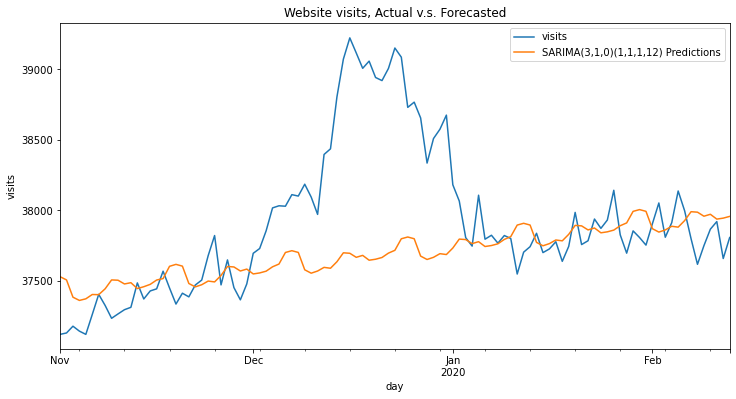

In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data,order=(1,1,2),seasonal_order=(1,1,1,18))
result = model.fit()
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,0)(1,1,1,12) Predictions')
ax = test_data.plot(legend=True,figsize=(12,6),title='Website visits, Actual v.s. Forecasted')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='visits');

In [149]:
from statsmodels.tools.eval_measures import rmse
error2 = rmse(test_data,predictions)
print(f"The RMSE for test data is {error2}")

The RMSE for test data is 546.0512601295278


In [150]:
from pmdarima import auto_arima
auto_arima(train_data,seasonal=True,m=12).summary()

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  382
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2459.752
Date:                Thu, 21 Apr 2022   AIC                           4929.505
Time:                        18:37:01   BIC                           4949.219
Sample:                             0   HQIC                          4937.326
                                - 382                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7499      1.229      2.238      0.025       0.342       5.158
ar.L1          0.4820      0.098      4.917      0.000       0.290       0.674
ma.L1         -0.6773      0.102     -6.628      0.000      -0.878      -0.477
ma.L2         -0.1762      0.071     -2.473      0.013      -0.316      -0.037
sigma2      2.372e+04   1698.636     13.965      0.000    2.04e+04    2.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.73   Prob(JB):                         0.64
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMAX model for visits variable in Rome

In [151]:
#3 dataset for each city
Milan = df[df["city"] == "Milan"]
Rome = df[df["city"] == "Rome"]
Naples = df[df["city"] == "Naples"]

In [152]:
Rome.index = pd.to_datetime(Rome.day)
  
Rome =Rome["visits"]['2018-10-15':'2020-2-13']
Rome.describe()

count      487.000000
mean     16625.453799
std        665.093469
min      15251.000000
25%      16166.000000
50%      16574.000000
75%      16996.000000
max      18744.000000
Name: visits, dtype: float64

### Fit the SARIMAX model

In [153]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,10,31)
test_dataset_end=datetime(2020,2,13)
train_data=Rome[:train_dataset_end]
test_data=Rome[train_dataset_end+timedelta(days=1):test_dataset_end]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


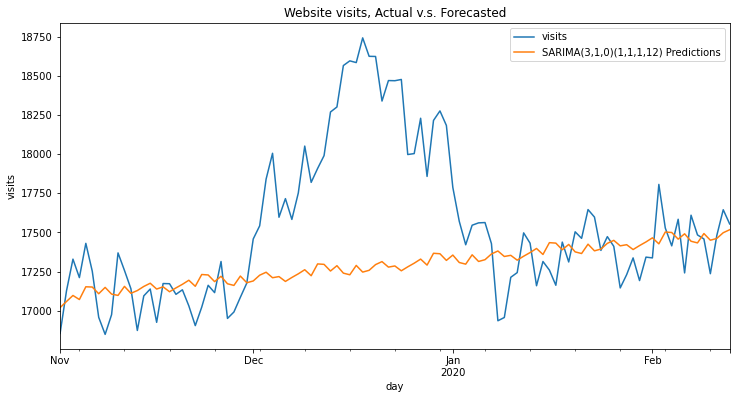

In [154]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data,order=(1,1,2),seasonal_order=(1,1,1,18))
result = model.fit()
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,0)(1,1,1,12) Predictions')
ax = test_data.plot(legend=True,figsize=(12,6),title='Website visits, Actual v.s. Forecasted')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='visits');

In [155]:
from statsmodels.tools.eval_measures import rmse
error2 = rmse(test_data,predictions)
print(f"The RMSE for test data is {error2}")

The RMSE for test data is 528.636622367324


### SARIMAX model for visits variable in Naples

In [156]:
Naples.index = pd.to_datetime(Naples.day)
  
Naples =Naples["visits"]['2018-10-15':'2020-2-13']
Naples.describe()

count      487.000000
mean     26013.223819
std       1577.805534
min      22428.000000
25%      24797.000000
50%      25776.000000
75%      27117.000000
max      30359.000000
Name: visits, dtype: float64

### Fit the SARIMAX model

In [157]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,10,31)
test_dataset_end=datetime(2020,2,13)
train_data=Naples[:train_dataset_end]
test_data=Naples[train_dataset_end+timedelta(days=1):test_dataset_end]

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


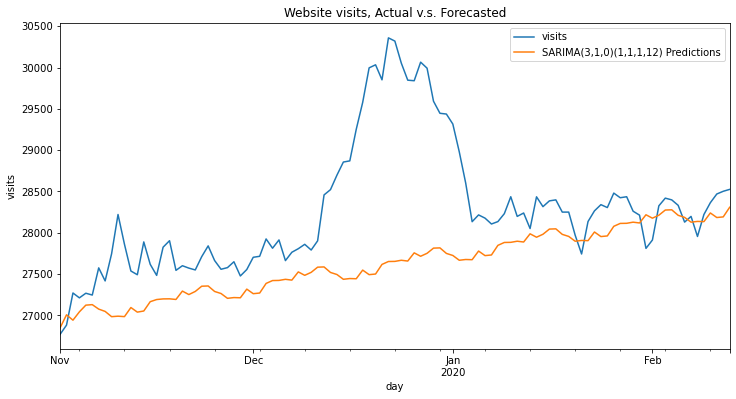

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data,order=(1,1,4),seasonal_order=(1,1,1,18))
result = model.fit()
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,0)(1,1,1,12) Predictions')
ax = test_data.plot(legend=True,figsize=(12,6),title='Website visits, Actual v.s. Forecasted')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='visits');

In [159]:
from statsmodels.tools.eval_measures import rmse
error2 = rmse(test_data,predictions)
print(f"The RMSE for test data is {error2}")

The RMSE for test data is 967.5348192527642


### FBPROPHET model

In [142]:
import warnings; 
warnings.simplefilter('ignore')

In [145]:
df.index = pd.to_datetime(df.day)
df

city        day  convrate  avspend  visits        N_sales
day                                                                    
2018-10-15   Milan 2018-10-15     0.477    60.04   35820   75094.339623
2018-10-15    Rome 2018-10-15     0.463    47.74   15830   34190.064795
2018-10-15  Naples 2018-10-15     0.613    26.14   22428   36587.275693
2018-10-16   Milan 2018-10-16     0.456    67.34   35929   78791.666667
2018-10-16    Rome 2018-10-16     0.580    34.76   15474   26679.310345
...            ...        ...       ...      ...     ...            ...
2020-02-12    Rome 2020-02-12     0.743    27.50   17645   23748.317631
2020-02-12  Naples 2020-02-12     0.356    47.25   28502   80061.797753
2020-02-13   Milan 2020-02-13     0.362    80.37   37808  104441.988950
2020-02-13    Rome 2020-02-13     0.719    26.27   17554   24414.464534
2020-02-13  Naples 2020-02-13     0.705    24.43   28525   40460.992908

[1461 rows x 6 columns]

In [146]:
#Create pandas time series
df['visits'] = df.visits.rolling(window=7).mean().fillna(0)

### Preparing the dataset to be used for Prophet model

In [147]:
ts = pd.DataFrame({'ds':df.index,'y':df.visits})
ts.head()

ds    y
day                       
2018-10-15 2018-10-15  0.0
2018-10-15 2018-10-15  0.0
2018-10-15 2018-10-15  0.0
2018-10-16 2018-10-16  0.0
2018-10-16 2018-10-16  0.0

#### Fit the time series

In [148]:
from prophet import Prophet
#Instantiate the model 
prophet = Prophet(yearly_seasonality=True,daily_seasonality=True)
prophet.fit(ts)

### Create a future dataframe

In [149]:
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

#### Display the most critical output columns form the forecast

In [150]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

ds          yhat    yhat_lower    yhat_upper
0 2018-10-15  20785.237207  18316.309786  23247.313317
1 2018-10-16  20932.567937  18462.430693  23323.672529
2 2018-10-17  21392.246483  19049.442929  23799.027136
3 2018-10-18  21531.759039  19108.824096  23920.163507
4 2018-10-19  21688.994812  19251.177135  23859.436565

#### Plots

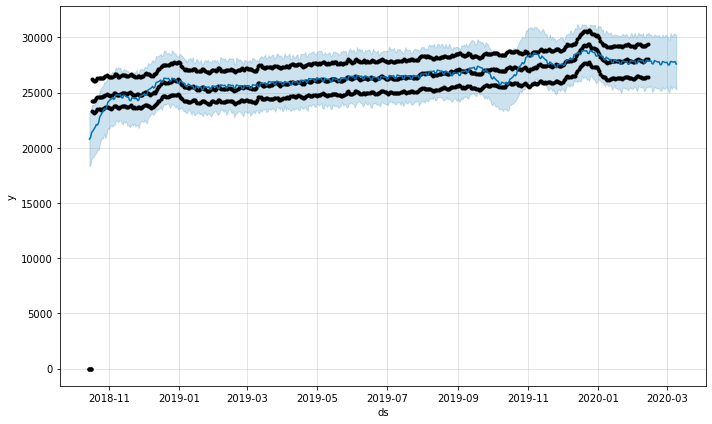

In [151]:
fig = prophet.plot(forecast)

#### Adding changepoints

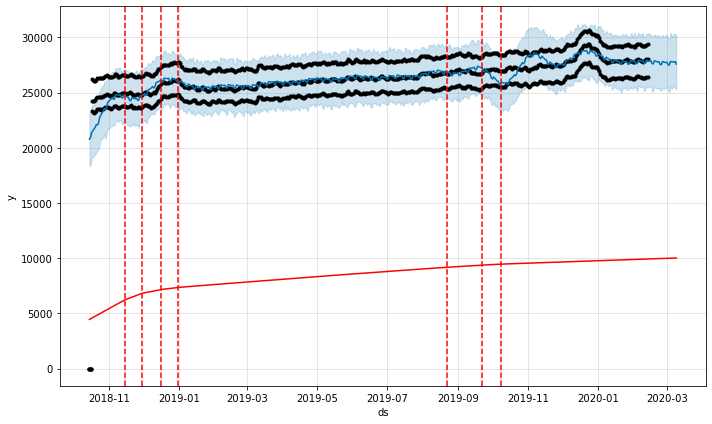

In [152]:
from prophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

#### Running the model with the changes yields

In [153]:
#Instantiate the model and fit the timeseries
prophet = Prophet(daily_seasonality=True,weekly_seasonality=False,yearly_seasonality=True,changepoint_range=1,changepoint_prior_scale=0.75)
prophet.fit(ts)

In [154]:
#Create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

#### Display the most critical output columns from the forecast

In [155]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

ds          yhat    yhat_lower    yhat_upper
0 2018-10-15  15622.595356  13537.987553  17896.244675
1 2018-10-16  16507.608523  14306.327229  18515.875293
2 2018-10-17  17365.025012  15164.692572  19484.866564
3 2018-10-18  18191.257949  15983.442585  20296.540588
4 2018-10-19  18983.187652  16770.146242  21031.491785

#### Plot

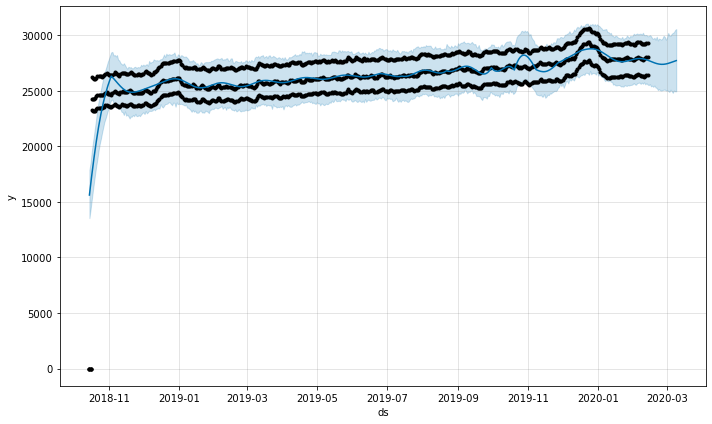

In [156]:
fig = prophet.plot(forecast)

#### Create a future dataframe with all the components

In [157]:
m = Prophet(interval_width=0.95, daily_seasonality=True,yearly_seasonality=True)
model = m.fit(ts)

future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

ds        trend    yhat_lower    yhat_upper  trend_lower  \
0 2018-10-15  4452.151309  16856.640700  24313.744553  4452.151309   
1 2018-10-16  4509.548379  17292.798123  24591.770144  4509.548379   
2 2018-10-17  4566.945449  17940.889668  25219.285190  4566.945449   
3 2018-10-18  4624.342520  17643.111588  25478.692558  4624.342520   
4 2018-10-19  4681.739590  18208.156309  25484.303593  4681.739590   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  4452.151309    16333.085898          16333.085898          16333.085898   
1  4509.548379    16423.019558          16423.019558          16423.019558   
2  4566.945449    16825.301033          16825.301033          16825.301033   
3  4624.342520    16907.416520          16907.416520          16907.416520   
4  4681.739590    17007.255222          17007.255222          17007.255222   

          daily  ...      weekly  weekly_lower  weekly_upper       yearly  \
0  17832.254992  ... -181.649659   -181.649659   -181.649659 -1317.519435   
1  17832.254992  ... -179.160138   -179.160138   -179.160138 -1230.075296   
2  17832.254992  ...  120.441918    120.441918    120.441918 -1127.395877   
3  17832.254992  ...   86.075734     86.075734     86.075734 -1010.914206   
4  17832.254992  ...   57.326539     57.326539     57.326539  -882.326309   

   yearly_lower  yearly_upper  multiplicative_terms  \
0  -1317.519435  -1317.519435                   0.0   
1  -1230.075296  -1230.075296                   0.0   
2  -1127.395877  -1127.395877                   0.0   
3  -1010.914206  -1010.914206                   0.0   
4   -882.326309   -882.326309                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  20785.237207  
1                         0.0                         0.0  20932.567937  
2                         0.0                         0.0  21392.246483  
3                         0.0                         0.0  21531.759039  
4                         0.0                         0.0  21688.994812  

[5 rows x 22 columns]

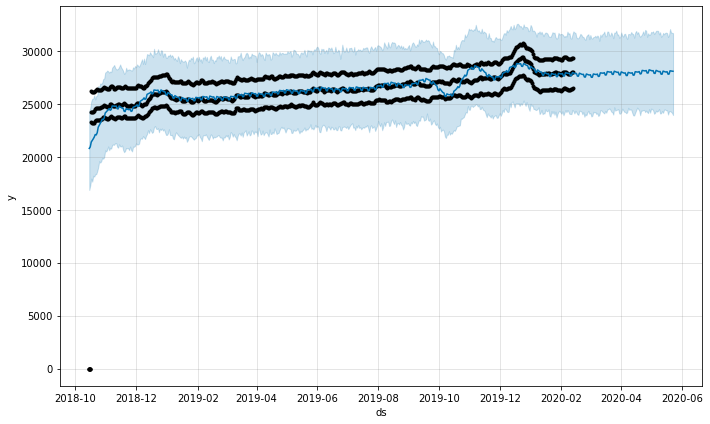

In [158]:
plot1 = m.plot(forecast)

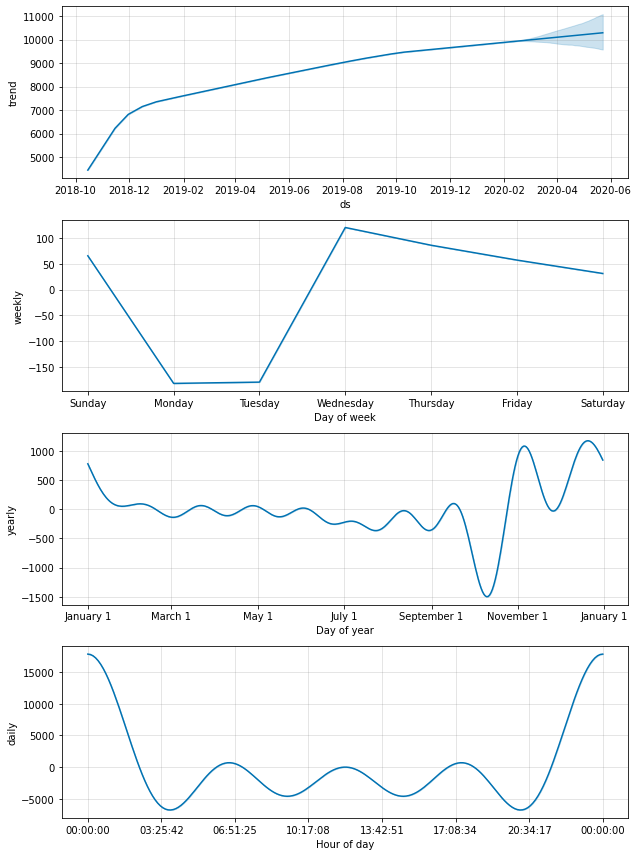

In [159]:
plt2 = m.plot_components(forecast)

In [162]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(prophet, forecast)



In [163]:
plot_components_plotly(prophet, forecast)


#### Performance metrics

INFO:prophet:Making 3 forecasts with cutoffs between 2019-11-03 00:00:00 and 2020-01-04 00:00:00
100%|██████████| 3/3 [01:55<00:00, 38.35s/it]


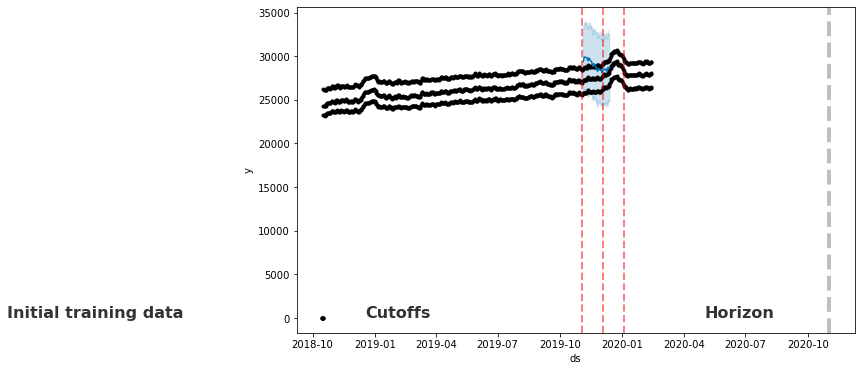

In [168]:
from prophet.diagnostics import cross_validation
# Fit the model with two years of data and define a horizon of 365 days forcasting per month
df_cv = cross_validation(m, initial='365 days', period = '31 days', horizon = '40 days')
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
#ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

# Making all the vlines for cutoffs
for item in cutoffs:
  ax.axvline(x=pd.to_datetime(item), c='red', lw=2, alpha=0.5, ls='--')

# Adding text to describe the data set splits
ax.text(x=pd.to_datetime('2017-07-07'),y=12, s='Initial training data', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2018-12-17'),y=24, s='Cutoffs', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.text(x=pd.to_datetime(cutoff) + pd.Timedelta('180 days'),y=24, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')

In [169]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon           mse         rmse          mae      mape     mdape  \
0  4 days  7.277885e+06  2697.755569  2425.697797  0.091068  0.088485   
1  5 days  7.770760e+06  2787.608235  2524.219795  0.094640  0.095827   
2  6 days  8.231433e+06  2869.047452  2615.151572  0.098005  0.095827   
3  7 days  8.065280e+06  2839.943735  2582.123506  0.096729  0.094161   
4  8 days  7.395648e+06  2719.494136  2439.613975  0.091336  0.089727   

      smape  coverage  
0  0.086125  0.750000  
1  0.089382  0.750000  
2  0.092445  0.750000  
3  0.091281  0.750000  
4  0.086336  0.833333

#### Performance metrics plots

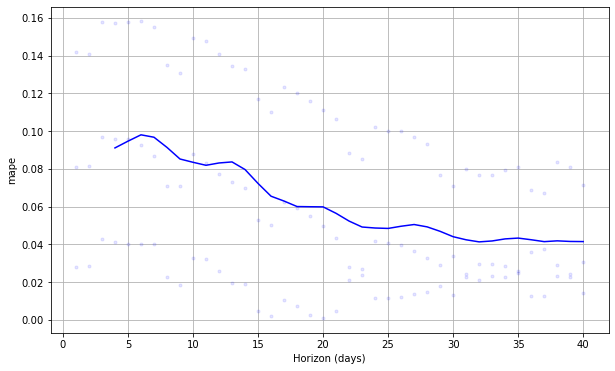

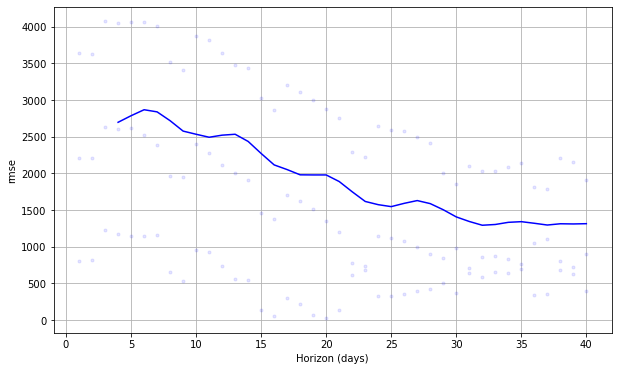

In [170]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### FBPROPHET model for sales variable

In [171]:
df['N_sales'] = df.N_sales.rolling(window=7).mean().fillna(0)

In [172]:
#Preparing the dataset to be used for Prophet model
ts = pd.DataFrame({'ds':df.index,'y':df.N_sales})
ts.head()

ds    y
day                       
2018-10-15 2018-10-15  0.0
2018-10-15 2018-10-15  0.0
2018-10-15 2018-10-15  0.0
2018-10-16 2018-10-16  0.0
2018-10-16 2018-10-16  0.0

In [173]:
from prophet import Prophet
# instantiate the model and fit the timeseries
prophet = Prophet(yearly_seasonality=True,daily_seasonality=True)
prophet.fit(ts)

In [174]:
#Create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

In [175]:
#Display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

ds          yhat    yhat_lower    yhat_upper
0 2018-10-15  40766.387876  34037.734017  48426.179701
1 2018-10-16  41627.411666  34586.154639  49005.937267
2 2018-10-17  42933.302498  35421.725676  50206.074327
3 2018-10-18  43010.530239  36813.986300  50045.008636
4 2018-10-19  42304.060715  35196.410090  49102.653020

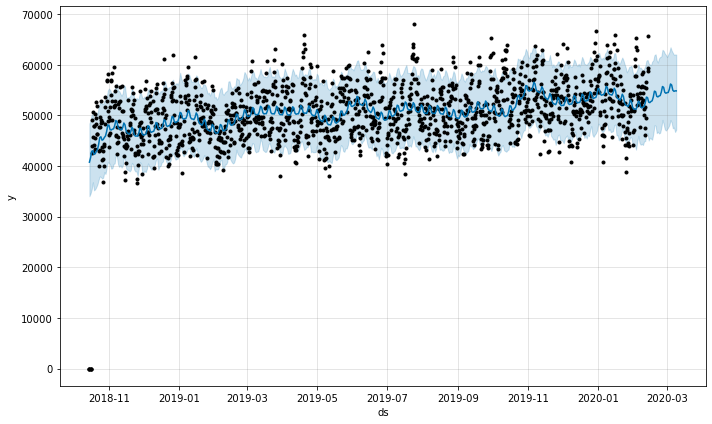

In [176]:
#Plot
fig = prophet.plot(forecast)

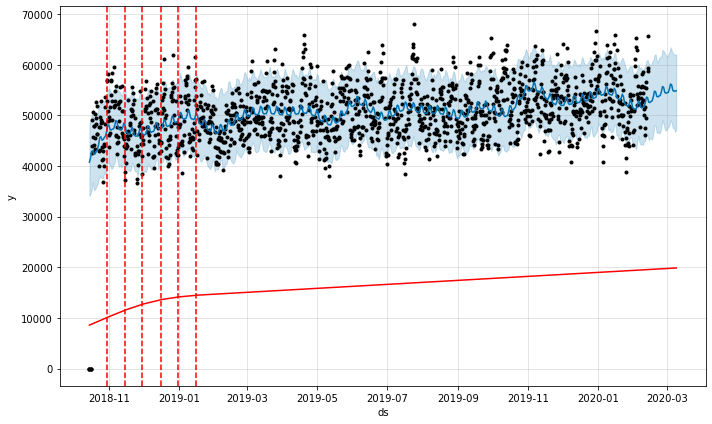

In [177]:
from prophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

In [178]:
#Running the model again with these changes yields:
#instantiate the model and fit the timeseries
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75,daily_seasonality=True,yearly_seasonality=True)
prophet.fit(ts)

In [179]:
#Create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

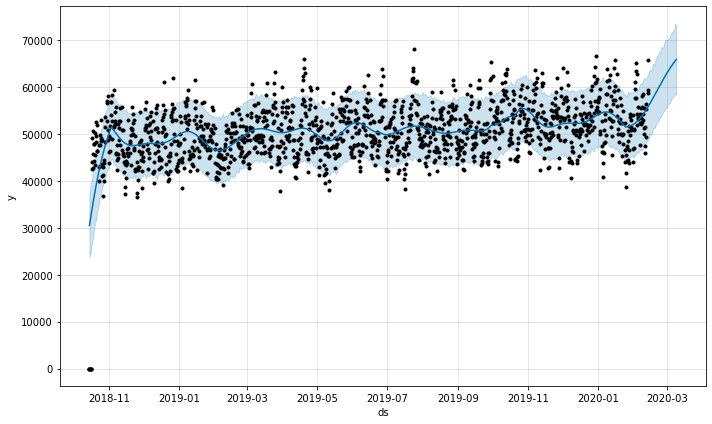

In [180]:
#Display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

#Plot
fig = prophet.plot(forecast)

In [181]:
m = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True)
model = m.fit(ts)

future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

ds        trend    yhat_lower    yhat_upper  trend_lower  \
0 2018-10-15  8583.028389  29864.113327  50764.742276  8583.028389   
1 2018-10-16  8681.433369  30773.271927  52427.625027  8681.433369   
2 2018-10-17  8779.838348  31692.438774  53669.806196  8779.838348   
3 2018-10-18  8878.243327  32140.658924  53759.319719  8878.243327   
4 2018-10-19  8976.648307  31836.279607  52988.544261  8976.648307   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  8583.028389    32183.359487          32183.359487          32183.359487   
1  8681.433369    32945.978297          32945.978297          32945.978297   
2  8779.838348    34153.464150          34153.464150          34153.464150   
3  8878.243327    34132.286911          34132.286911          34132.286911   
4  8976.648307    33327.412409          33327.412409          33327.412409   

          daily  ...       weekly  weekly_lower  weekly_upper       yearly  \
0  34348.892795  ...  -535.758958   -535.758958   -535.758958 -1629.774350   
1  34348.892795  ...    44.989774     44.989774     44.989774 -1447.904272   
2  34348.892795  ...  1040.368512   1040.368512   1040.368512 -1235.797157   
3  34348.892795  ...   779.774237    779.774237    779.774237  -996.380120   
4  34348.892795  ...  -288.276412   -288.276412   -288.276412  -733.203974   

   yearly_lower  yearly_upper  multiplicative_terms  \
0  -1629.774350  -1629.774350                   0.0   
1  -1447.904272  -1447.904272                   0.0   
2  -1235.797157  -1235.797157                   0.0   
3   -996.380120   -996.380120                   0.0   
4   -733.203974   -733.203974                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  40766.387876  
1                         0.0                         0.0  41627.411666  
2                         0.0                         0.0  42933.302498  
3                         0.0                         0.0  43010.530239  
4                         0.0                         0.0  42304.060715  

[5 rows x 22 columns]

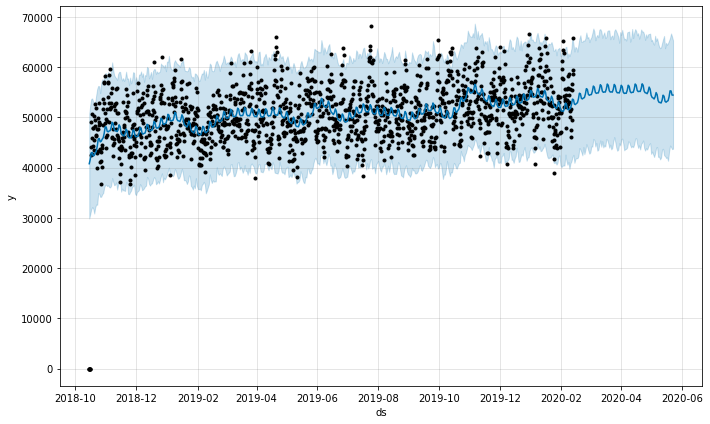

In [182]:
plot1 = m.plot(forecast)

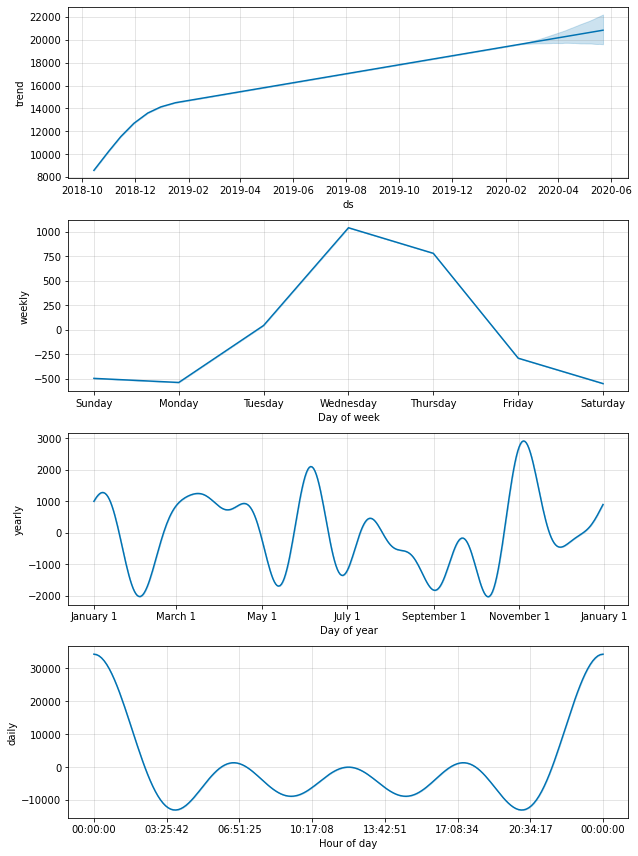

In [183]:
plt2 = m.plot_components(forecast)

In [184]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(prophet, forecast)

In [185]:
plot_components_plotly(prophet, forecast)

INFO:prophet:Making 3 forecasts with cutoffs between 2019-11-03 00:00:00 and 2020-01-04 00:00:00
100%|██████████| 3/3 [00:58<00:00, 19.45s/it]


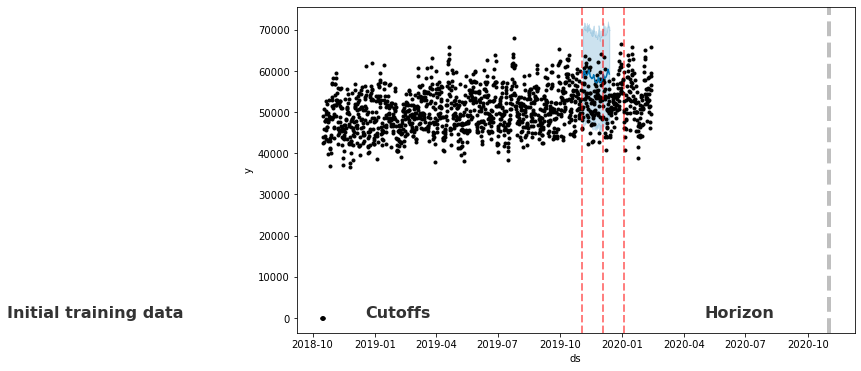

In [186]:
# Fit the model with two years of data and define a horizon of 365 days forcasting per month
df_cv = cross_validation(m, initial='365 days', period = '31 days', horizon = '40 days')
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
#ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

# Making all the vlines for cutoffs
for item in cutoffs:
  ax.axvline(x=pd.to_datetime(item), c='red', lw=2, alpha=0.5, ls='--')

# Adding text to describe the data set splits
ax.text(x=pd.to_datetime('2017-07-07'),y=12, s='Initial training data', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2018-12-17'),y=24, s='Cutoffs', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.text(x=pd.to_datetime(cutoff) + pd.Timedelta('180 days'),y=24, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')

In [187]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon           mse         rmse          mae      mape     mdape  \
0  4 days  2.486716e+07  4986.698482  4104.403242  0.076645  0.061006   
1  5 days  1.470652e+07  3834.907951  3125.727129  0.055978  0.046282   
2  6 days  1.935358e+07  4399.270335  3779.353250  0.068151  0.057738   
3  7 days  2.844114e+07  5333.023296  4685.972167  0.086988  0.084602   
4  8 days  6.626907e+07  8140.581548  6897.712712  0.139844  0.115759   

      smape  coverage  
0  0.072713  1.000000  
1  0.054111  1.000000  
2  0.065690  1.000000  
3  0.082800  1.000000  
4  0.126902  0.833333

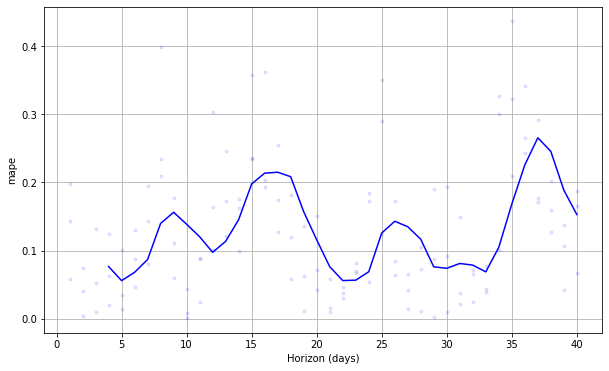

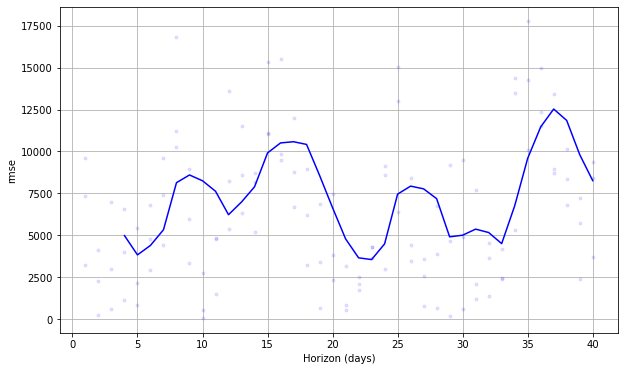

In [188]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Causal Impact model

In [189]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from causalimpact import CausalImpact

In [191]:
Sales_df = pd.read_csv('Sales.csv')
WebT_df = pd.read_csv("WebTraffic.csv")

df = pd.merge(Sales_df, WebT_df)

#We decided to divide Convrate and Visits in order to measure the sales
df['N_sales'] = df['visits'] / df['convrate']


In [192]:
df['day'] = pd.to_datetime(df['day'])

#### Convert the dataframe into a wide form using a pivot table

In [193]:
df_piv = pd.pivot_table(df, values='N_sales',index='day',columns='city', aggfunc=np.sum)

# N_sales column is our Y. 
df_piv = df_piv[['Milan', 'Rome', 'Naples']]
df_piv.head()

city               Milan          Rome        Naples
day                                                 
2018-10-15  75094.339623  34190.064795  36587.275693
2018-10-16  78791.666667  26679.310345  42885.714286
2018-10-17  49532.593620  28967.741935  44544.378698
2018-10-18  83400.468384  23231.818182  48260.127932
2018-10-19  57674.267101  23662.079511  54729.468599

In [194]:
# Flatten the pivot table and set the index of the dataframe to the date column. 
df_flattened = pd.DataFrame(df_piv.to_records()).reset_index(drop=True)
df_flattened = df_flattened.set_index('day')
df_flattened.head()

Milan          Rome        Naples
day                                                 
2018-10-15  75094.339623  34190.064795  36587.275693
2018-10-16  78791.666667  26679.310345  42885.714286
2018-10-17  49532.593620  28967.741935  44544.378698
2018-10-18  83400.468384  23231.818182  48260.127932
2018-10-19  57674.267101  23662.079511  54729.468599

In [195]:
# Set the pre_period for the model to the dates prior to the delivery of ad campaign
# and the post_period to the dates after the campaign.
pre_period = ['2018-10-15', '2019-11-25']
post_period = ['2019-11-26', '2020-2-13']

In [196]:
# Run the model and display the results.
ci = CausalImpact(df_flattened, pre_period, post_period,prior_level_sd=None)

### Plots

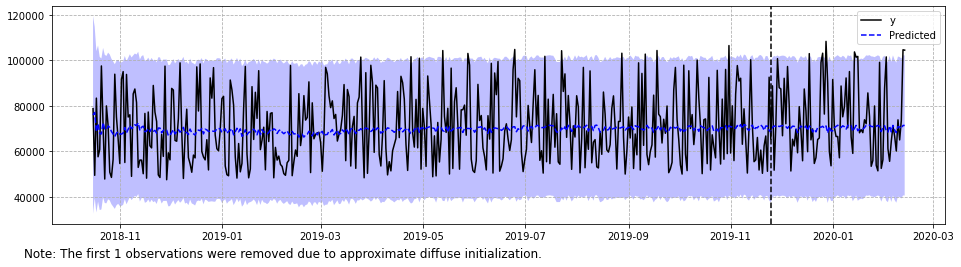

In [197]:
ci.plot(panels=['original'], figsize=(16,4))

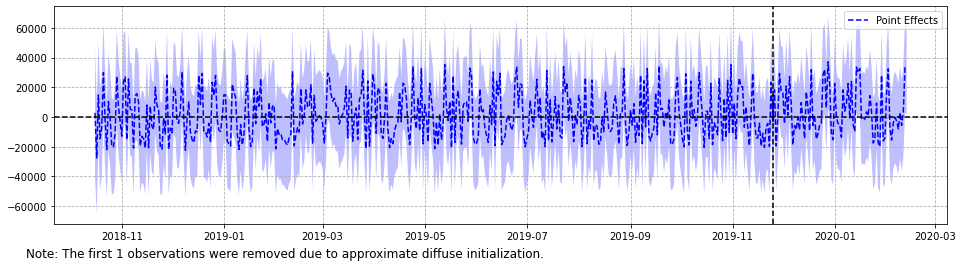

In [198]:
ci.plot(panels=['pointwise'], figsize=(16,4))

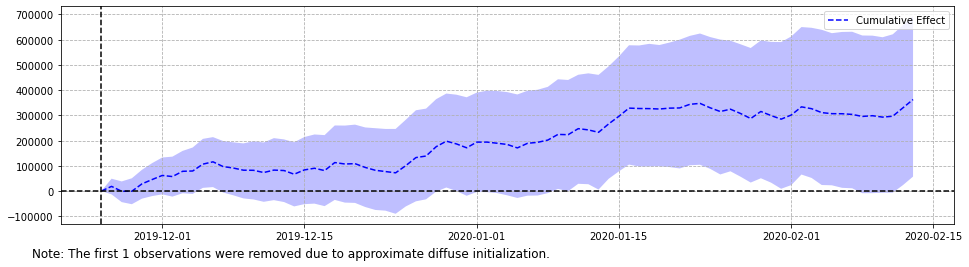

In [199]:
ci.plot(panels=['cumulative'], figsize=(16,4))

### Display model summary output.

In [200]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    74988.23           5999058.37
Prediction (s.d.)         70453.79 (2029.12) 5636302.84 (162329.67)
95% CI                    [66320.23, 74274.23][5305618.03, 5941938.65]

Absolute effect (s.d.)    4534.44 (2029.12)  362755.53 (162329.67)
95% CI                    [714.0, 8668.0]    [57119.72, 693440.34]

Relative effect (s.d.)    6.44% (2.88%)      6.44% (2.88%)
95% CI                    [1.01%, 12.3%]     [1.01%, 12.3%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 98.7%

For more details run the command: print(impact.summary('report'))


### Display model analysis report.

In [201]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 74988.23. By contrast, in the absence of an
intervention, we would have expected an average response of 70453.79.
The 95% interval of this counterfactual prediction is [66320.23, 74274.23].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4534.44 with a 95% interval of
[714.0, 8668.0]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 5999058.37.
By contrast, had the intervention not taken place, we would have expected
a sum of 5636302.84. The 95% interval of this prediction is [5305618.03, 5941938.65].


The above results are given in terms of absolute numbers. In rela